In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel, linear_kernel
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import KernelCenterer
from sklearn.metrics.pairwise import pairwise_kernels



In [2]:
df = pd.read_csv('Lung.csv')

In [3]:
df.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,Label
0,7314.747386,7391.483138,7334.393081,10994.201497,471.496698,318.193106,1156.241547,3272.099771,3363.611772,442.783758,...,3.022415,0.0,0.000000,1.847031,0,40.298863,35.429417,148.602058,12118.707689,1
1,9518.042994,9460.443528,9574.874468,17578.281899,785.810318,358.652676,771.986446,3871.452122,3917.224498,487.829079,...,6.451140,0.0,128.562009,4.607957,0,8.601520,38.860440,111.512567,7471.802757,1
2,4479.976340,4387.407628,4447.955716,12394.310110,404.624244,855.241747,246.267705,1353.016896,1415.311564,416.850300,...,2.910966,0.0,161.267504,1.746579,0,33.767203,31.438430,168.253822,16026.613214,1
3,21277.962603,21166.590502,21255.800397,15161.474118,6684.570363,503.278464,2185.922959,15012.229891,14987.262342,1107.549261,...,6.452288,0.0,1.683206,10.660302,0,5.049617,95.101114,1416.978551,12750.562682,1
4,8002.355461,8013.396682,8033.638922,19358.942067,1276.411235,765.754731,593.005616,2630.801098,2649.433160,367.580673,...,9.201018,0.0,97.990843,3.450382,0,22.772520,46.235116,455.450396,14401.203493,1


Part 1: Principal Component Analysis (PCA)


In [4]:
data = df.iloc[:,:-1].to_numpy()   # Get all rows and all columns except the last one as NumPy array for features
label = df.iloc[:,-1].to_numpy()   # Get all rows and only the last column as NumPy array for labels
print(data.shape)                  # Print the dimensions of the feature matrix

(1091, 1881)


# Return Covariance marrix Function

In [5]:
def compute_cov_matrix(data):
    """Calculate the covariance matrix of the input data."""
    return np.cov(data, rowvar=False)  # rowvar=False means variables are in columns (not rows)

# Return Eigenvalues and Eigenvectors

In [6]:
def compute_eigenvalues_eigenvectors(cov_matrix):
    """Compute and sort eigenvalues and eigenvectors of the covariance matrix."""
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Use eigh for symmetric matrix
    idx = np.argsort(eigenvalues)[::-1]                       # Get indices to sort eigenvalues in descending order
    eigenvalues = eigenvalues[idx]                          # Sort eigenvalues
    eigenvectors = eigenvectors[:, idx]                     # Sort eigenvectors correspondingly
    return eigenvalues, eigenvectors

# Return my_explained_variance_ratio

In [7]:
def my_explained_variance_ratio(data, n_components):
    """Compute the explained variance ratio for the first n principal components."""
    # Centering the data (subtract mean)
    data_centered = data - np.mean(data, axis=0)

    # Compute the covariance matrix
    cov_matrix = compute_cov_matrix(data_centered)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = compute_eigenvalues_eigenvectors(cov_matrix)

    # Compute explained variance ratio
    return eigenvalues[:n_components] / np.sum(eigenvalues)

# PCA From scratch

PCA from scratch


In [8]:
def my_pca(data, n_components):
    # Center the data (subtract the mean of each feature)
    data_centered = data - np.mean(data, axis=0)

    # Compute the covariance matrix
    cov_matrix = compute_cov_matrix(data_centered)

   # Compute eigenvalues and eigenvectors or sort the eigenvalues and eigenvectors in descending order
    eigenvalues, eigenvectors = compute_eigenvalues_eigenvectors(cov_matrix)

    # Project the data onto the eigenvectors
    reduced_data = np.dot(data_centered, eigenvectors[:, :n_components])

    return reduced_data

b. Apply your PCA implementation to reduce the dimensionality of the features in Lung.csv


In [9]:
myreduced_data  = my_pca(data, 10)
my_explained_variance_ratio =  my_explained_variance_ratio(data, 10)
print(myreduced_data.shape)

(1091, 10)


In [10]:
# PCA module from sklearn

In [11]:
#Apply PCA from skylrean
pca = PCA(n_components=10)
pca.fit(data)
reduced_data_sklearn = pca.transform(data)
print(reduced_data_sklearn.shape)


(1091, 10)


# # Graph Scikit-learn vs From-Scratch PCA Data Explained Variance

C:\ano\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\ano\Lib\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


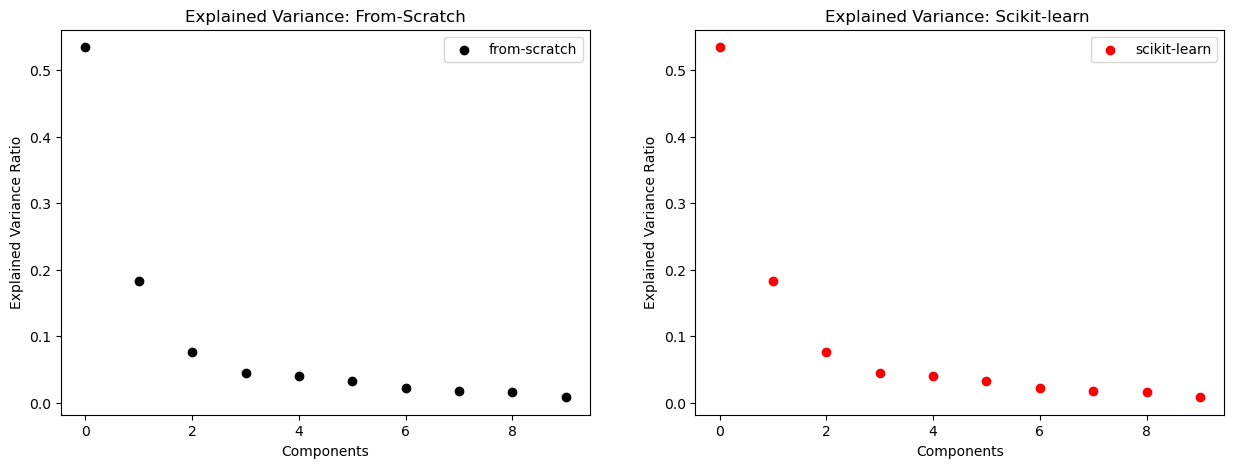

In [12]:
# Plot 1: Comparing explained variance ratios between custom PCA and scikit-learn PCA
plt.figure(figsize=(15, 5))  # Creates a wide figure for side-by-side comparison

# Left subplot for custom PCA implementation
plt.subplot(1, 2, 1)
plt.scatter(np.arange(len(my_explained_variance_ratio)),
           my_explained_variance_ratio,
           label='from-scratch',
           alpha=1,
           color='black')  # Uses black markers for custom implementation
plt.title('Explained Variance: From-Scratch')
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()

# Right subplot for scikit-learn PCA implementation
plt.subplot(1, 2, 2)
plt.scatter(np.arange(len(pca.explained_variance_ratio_)),
           pca.explained_variance_ratio_,
           label='scikit-learn',
           alpha=1,
           color='red')  # Uses red markers for scikit-learn implementation
plt.title('Explained Variance: Scikit-learn ')
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()

plt.show()  # Renders both plots

scatter plots of reduced data

# Graph Scikit-learn vs From-Scratch PCA Data Reduction

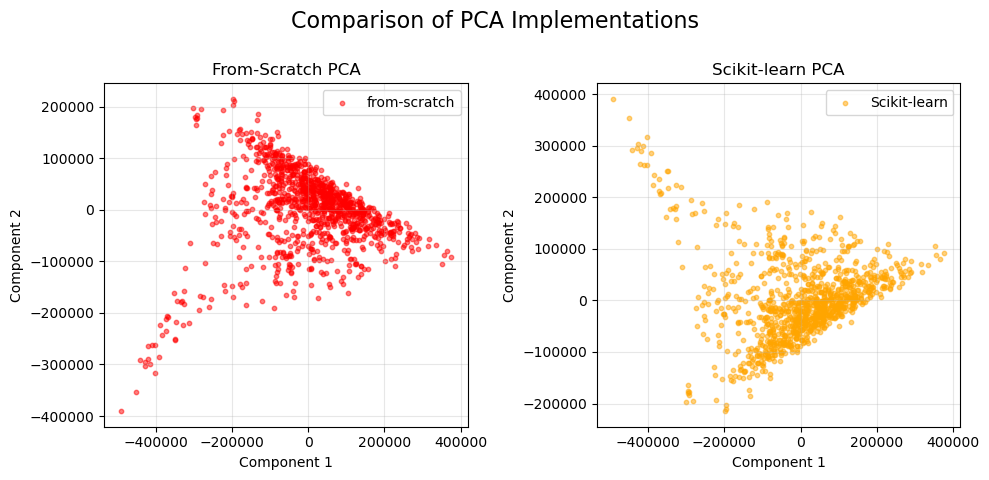

In [13]:
# Plot 2: Comparing the first two principal components between custom PCA and scikit-learn PCA
figure = plt.figure(figsize=(10, 5))

# Add a main title
figure.suptitle('Comparison of PCA Implementations', fontsize=16, y=0.95)

# First subplot - From-scratch PCA
plt.subplot(1, 2, 1)
plt.scatter(myreduced_data[:,0], myreduced_data[:,1],
            label='from-scratch', color='red', alpha=0.5, s=10)
plt.title('From-Scratch PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(alpha=0.3)

# Second subplot - Scikit-learn PCA
plt.subplot(1, 2, 2)
plt.scatter(reduced_data_sklearn[:,0], reduced_data_sklearn[:,1],
            label='Scikit-learn', color='orange', alpha=0.5, s=10)
plt.title('Scikit-learn PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(alpha=0.3)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Linear KPCA From Scratch

2.1 KPCA with RBF Kernel:
a. Implement Kernel PCA with the Radial Basis Function (RBF) kernel from scratch.

In [14]:
def rbf_kpca(data, n_components, gamma):
    """
    Perform Kernel PCA using Radial Basis Function (RBF) kernel

    Parameters:
    data: Input data matrix
    n_components: Number of principal components to return
    gamma: Parameter for RBF kernel
    """
    # Compute the RBF kernel matrix
    kernel_matrix = rbf_kernel(data, gamma=gamma)

    # Get the number of samples
    n_samples = kernel_matrix.shape[0]

    # Create matrix for centering in kernel space
    one_n = np.ones((n_samples, n_samples)) / n_samples

    # Center the kernel matrix in feature space
    # This is equivalent to centering the data in the implicit feature space
    centered_kernel_matrix = kernel_matrix - one_n @ kernel_matrix - kernel_matrix @ one_n + one_n @ kernel_matrix @ one_n

    # Compute eigenvalues and eigenvectors of the centered kernel matrix
    eigenvalues, eigenvectors = compute_eigenvalues_eigenvectors(centered_kernel_matrix)

    # Project data onto eigenvectors and scale by square root of eigenvalues
    # This scaling ensures that the projected data has the correct variance
    reduced_data = eigenvectors[:, :n_components] * np.sqrt(eigenvalues[:n_components])

    return reduced_data


In [15]:
rbf_kpca = rbf_kpca(data, 10, 1)
print(rbf_kpca.shape)

(1091, 10)


# Polynomials KPCA From Scratch

In [16]:
def polynimial_kpca(data, n_components, degree):
    """
    Perform Kernel PCA using Polynomial kernel

    Parameters:
    data: Input data matrix
    n_components: Number of principal components to return
    degree: Degree of the polynomial kernel
    """
    # Compute the polynomial kernel matrix
    kernel_matrix = polynomial_kernel(data, degree=degree)

    # Get the number of samples
    n_samples = kernel_matrix.shape[0]

    # Create matrix for centering in kernel space
    one_n = np.ones((n_samples, n_samples)) / n_samples

    # Center the kernel matrix in feature space
    centered_kernel_matrix = kernel_matrix - one_n @ kernel_matrix - kernel_matrix @ one_n + one_n @ kernel_matrix @ one_n

    # Compute eigenvalues and eigenvectors of the centered kernel matrix
    eigenvalues, eigenvectors = compute_eigenvalues_eigenvectors(centered_kernel_matrix)

    # Project data onto eigenvectors and scale by square root of eigenvalues
    reduced_data = eigenvectors[:, :n_components] * np.sqrt(eigenvalues[:n_components])

    return reduced_data

In [17]:
poly_kpca = polynimial_kpca(data, 10 , 2)
print(poly_kpca.shape)

(1091, 10)


# Linear Kpca From Scratch

2.3 KPCA with Linear Kernel:
a. Implement Kernel PCA with a Linear kernel from scratch.



In [18]:
def linear_kpca(data, n_components):
    """
    Perform Kernel PCA using Linear kernel (equivalent to standard PCA)

    Parameters:
    data: Input data matrix
    n_components: Number of principal components to return
    """
    # Compute the linear kernel matrix (dot product)
    kernel_matrix = linear_kernel(data)

    # Get the number of samples
    n_samples = kernel_matrix.shape[0]

    # Create matrix for centering in kernel space
    one_n = np.ones((n_samples, n_samples)) / n_samples

    # Center the kernel matrix in feature space
    centered_kernel_matrix = kernel_matrix - one_n @ kernel_matrix - kernel_matrix @ one_n + one_n @ kernel_matrix @ one_n

    # Compute eigenvalues and eigenvectors of the centered kernel matrix
    eigenvalues, eigenvectors = compute_eigenvalues_eigenvectors(centered_kernel_matrix)

    # Project data onto eigenvectors and scale by square root of eigenvalues
    reduced_data = eigenvectors[:, :n_components] * np.sqrt(eigenvalues[:n_components])

    return reduced_data

b. Apply your KPCA implementation to the dataset.

In [19]:
liner_kpca = linear_kpca(data, 10)
print(liner_kpca.shape)

(1091, 10)


# combined KPCA Function

In [20]:
def combined_kpca(Train, Test, n_components, gamma, degree):
    # Compute combined kernel matrix for training data
    Train_kernel_matrix = rbf_kernel(Train, gamma=gamma) + polynomial_kernel(Train, degree=degree)
    kpca = KernelPCA(n_components=n_components, kernel='precomputed')
    kpca.fit(Train_kernel_matrix)
    Train_kpca = kpca.transform(Train_kernel_matrix)

    # Trasform test data
    Test_kernel_matrix = rbf_kernel(Test, Train, gamma=gamma) + polynomial_kernel(Test, Train, degree=degree)
    Test_kpca = kpca.transform(Test_kernel_matrix)

    return Train_kpca, Test_kpca

In [21]:
data1 , data2 = combined_kpca(data, data , 10, 1, 2)
print(data1.shape)
print(data2.shape)

(1091, 10)
(1091, 10)


# Construct minimun distance classifier

In [22]:
# find the distance between two points
def dis1 (x ,y):
  return np.linalg.norm(x-y,2)

In [23]:
def mindisclassifier(Train, Trainlabel, Test):
    """
    Implement a Minimum Distance Classifier that predicts the label of each test point
    based on the closest training point.

    Parameters:
    Train: Training data features
    Trainlabel: Training data labels
    Test: Test data features

    Returns:
    pred: Predicted labels for test data
    """
    pred = []
    for testpoint in Test:
        pred_dis = []
        for trainpoint in Train:
            pred_dis.append(dis1(testpoint, trainpoint))  # Calculate distance between test point and each training point
        pred.append(Trainlabel[np.argmin(pred_dis)])      # Assign label of closest training point
    return pred

# Construct BayesClassifier

In [24]:
class BayesClassifier:
  def __init__(self):
    self.classes = None
    self.mean = None
    self.variance = None
    self.priors = None
  def fit(self, X, y):
    """
      Train the Bayes Classifier.
      parameters:
      x:np.ndarray
        Feature matrix of shape (n_samples, n_features)
      y:np.ndarray
        Class label of shape (n_samples,)
      """
    self.classes = np.unique(y)
    n_features = X.shape[1]
    n_classes = len(self.classes)

    # Initialize arrays to store class wise statistics
    self.mean = np.zeros((n_classes, n_features))
    self.variance = np.zeros((n_classes, n_features))
    self.priors = np.zeros(n_classes)


    for idx, cls in enumerate(self.classes):
      X_c = X[y == cls]
      self.mean[idx, :] = X_c.mean(axis=0)
      self.variance[idx, :] = X_c.var(axis=0)
      self.priors[idx] = X_c.shape[0] / float(X.shape[0])

  def _caculate_likelihood(self, mean , var, x):
    """
      Calculate the gaussian likelihood of the data
    """
    eps = 1e-6 # add small epsilon to vatiance to avoid division by zero
    coeff = 1 / np.sqrt(2.0 * np.pi * var + eps)
    exponent = -((x-mean) **2) / (2 * (var + eps))
    return coeff * np.exp(exponent)

  def _calculate_posterior(self, x):
    """
      Calculate the posterior probability for each class
    """
    posteriors = []
    for idx, cls in enumerate(self.classes):
      prior = np.log(self.priors[idx])
      likelihood = np.sum(np.log(self._caculate_likelihood(self.mean[idx,:], self.variance[idx, :], x)), axis= 1)
      posteriors.append(prior + likelihood)
    return np.array(posteriors).T

  def predict(self, X):
    """
      Predict the class labels of the data
    """
    posteriors = self._calculate_posterior(X)
    return self.classes[np.argmax(posteriors, axis = 1)]




# Construct KDA
Reference = https://github.com/concavegit/kfda

In [25]:
import warnings
from scipy.sparse.linalg import eigsh
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.metrics import pairwise_kernels, pairwise_distances
from sklearn.utils.multiclass import unique_labels
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.preprocessing import OneHotEncoder
from sklearn.exceptions import ConvergenceWarning
import numpy as np

class Kfda(BaseEstimator, ClassifierMixin, TransformerMixin):
    def __init__(self, n_components=2, kernel='linear', robustness_offset=1e-8,
                 **kwds):
        self.kernel = kernel
        self.n_components = n_components
        self.kwds = kwds
        self.robustness_offset = robustness_offset

        if kernel is None:
            self.kernel = 'linear'

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = unique_labels(y)

        # Check if n_components is valid
        max_components = min(self.classes_.size - 1, X.shape[0] - 1)
        if self.n_components > max_components:
            warnings.warn(
                f"n_components > min(classes_.size - 1, n_samples - 1). "
                f"Only the first {max_components} components will be valid."
            )
            self.n_components_ = max_components
        else:
            self.n_components_ = self.n_components

        self.X_ = X
        self.y_ = y

        # Use sparse_output=False for explicit dense output
        y_onehot = OneHotEncoder(sparse_output=False).fit_transform(
            self.y_[:, np.newaxis])

        K = pairwise_kernels(
            X, X, metric=self.kernel, **self.kwds)

        # Calculate class means with proper broadcasting
        y_onehot_sums = y_onehot.T.sum(axis=1, keepdims=True)
        m_classes = y_onehot.T @ K / np.maximum(y_onehot_sums, 1e-10)  # Avoid division by zero

        indices = (y_onehot @ np.arange(self.classes_.size)).astype('i')
        N = K @ (K - m_classes[indices])

        # Use numpy's eye function for dense matrices
        N += np.eye(self.y_.size) * self.robustness_offset

        # Fix the broadcasting issue
        m_classes_centered = m_classes - K.mean(axis=0)
        M = m_classes_centered.T @ m_classes_centered

        # Add small regularization to M for numerical stability
        M += np.eye(M.shape[0]) * self.robustness_offset

        # Handle edge case where n_components is too large
        k = min(self.n_components_, M.shape[0] - 1)
        if k < 1:
            k = 1  # Ensure at least one component

        # Use explicit parameter names for eigsh
        w, self.weights_ = eigsh(M, k=k, M=N, which='LM')

        # Compute centers
        self.centroids_ = m_classes @ self.weights_

        # Add small jitter to centroids to ensure they're distinct
        if self.centroids_.shape[0] > 1:
            std_dev = np.std(self.centroids_, axis=0)
            if np.any(std_dev < 1e-6):
                self.centroids_ += np.random.normal(0, 1e-4, size=self.centroids_.shape)

        return self

    def transform(self, X):
        check_is_fitted(self, ['weights_', 'centroids_'])
        X = check_array(X)
        return pairwise_kernels(
            X, self.X_, metric=self.kernel, **self.kwds
        ) @ self.weights_

    def predict(self, X):
        check_is_fitted(self, ['weights_', 'centroids_'])
        X = check_array(X)
        projected_points = self.transform(X)

        # Use our own nearest centroid prediction instead of NearestCentroid
        distances = pairwise_distances(projected_points, self.centroids_)
        return self.classes_[np.argmin(distances, axis=1)]

    def fit_additional(self, X, y):
        check_is_fitted(self, ['weights_', 'centroids_'])
        X, y = check_X_y(X, y)

        new_classes = np.unique(y)
        projections = self.transform(X)

        y_onehot = OneHotEncoder(sparse_output=False).fit_transform(
            y[:, np.newaxis])
        y_onehot_sums = y_onehot.T.sum(axis=1, keepdims=True)
        new_centroids = y_onehot.T @ projections / np.maximum(y_onehot_sums, 1e-10)

        self.classes_ = np.concatenate([self.classes_, new_classes])
        self.centroids_ = np.concatenate([self.centroids_, new_centroids])

        return self

#Extract these top 10 features


In [26]:
cov_matrix = compute_cov_matrix(data)

np.fill_diagonal(cov_matrix, 0)  # Zero out the diagonal
covariance_sums = np.sum(np.abs(cov_matrix), axis=0)
# Get the indices of the top 10 featuresq
top_10_feature_indices = np.argsort(covariance_sums)[::-1][:10]

# Extract these top 10 features
top_10_features = data[:, top_10_feature_indices]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(top_10_features, label, test_size=0.2)


In [27]:
x_train, x_test, y_train, y_test = train_test_split(top_10_features, label, test_size=0.2)


# mindisclassifier For top_10_features


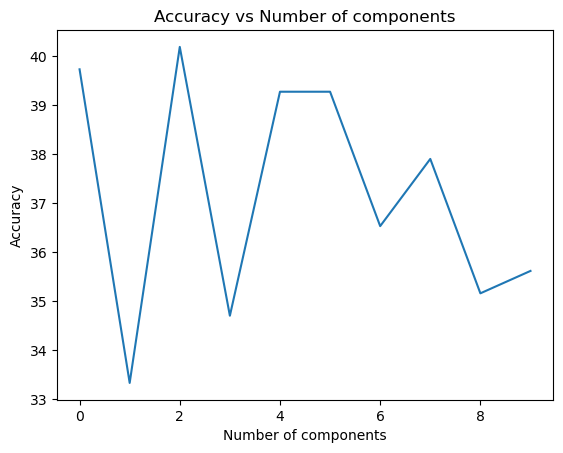

Best number of components: 3
Best accuracy: 40.182648401826484
Best precision: 20.23281621732554
Best recall: 20.41048741048741


In [28]:
# Evaluate PCA + Minimum Distance Classifier performance for different numbers of components
acc = []
precision = []
recall = []
for i in range(0, min(x_train.shape[0], x_train.shape[1])):
    # Initialize PCA with i+1 components
    pca = PCA(n_components=i + 1)
    pca.fit(x_train)

    # Transform training and test data using PCA
    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)

    # Use minimum distance classifier to predict labels
    y_pred = mindisclassifier(x_train_pca, y_train, x_test_pca)

    # Calculate and store performance metrics
    acc.append(accuracy_score(y_test, y_pred) * 100)
    precision.append(precision_score(y_test, y_pred, average='macro', zero_division=0) * 100)
    recall.append(recall_score(y_test, y_pred, average='macro', zero_division=0) * 100)

# Plot accuracy vs number of components for PCA
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()

# Print best results for PCA
print(f"Best number of components: {acc.index(max(acc)) + 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

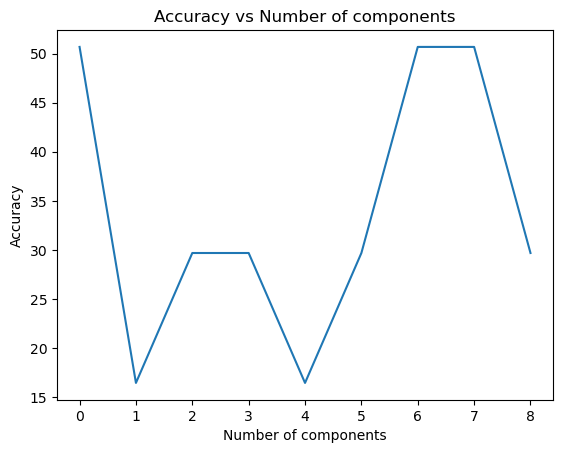

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [30]:
# Evaluate RBF Kernel PCA + Minimum Distance Classifier
acc = []
precision = []
recall = []
for i in range(9):
    # Initialize Kernel PCA with RBF kernel and i+1 components
    kpca = KernelPCA(n_components=i + 1, kernel='rbf')
    kpca.fit(x_train)

    # Transform training and test data using Kernel PCA
    x_train_kpca = kpca.transform(x_train)
    x_test_kpca = kpca.transform(x_test)

    # Use minimum distance classifier to predict labels
    y_pred = mindisclassifier(x_train_kpca, y_train, x_test_kpca)
    # Calculate and store performance metrics
    acc.append(accuracy_score(y_test, y_pred) * 100)
    precision.append(precision_score(y_test, y_pred, average='macro', zero_division=0) * 100)
    recall.append(recall_score(y_test, y_pred, average='macro', zero_division=0) * 100)

# Plot accuracy vs number of components for RBF Kernel PCA
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()

# Print best results for RBF Kernel PCA
print(f"Best number of components: {acc.index(max(acc)) + 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

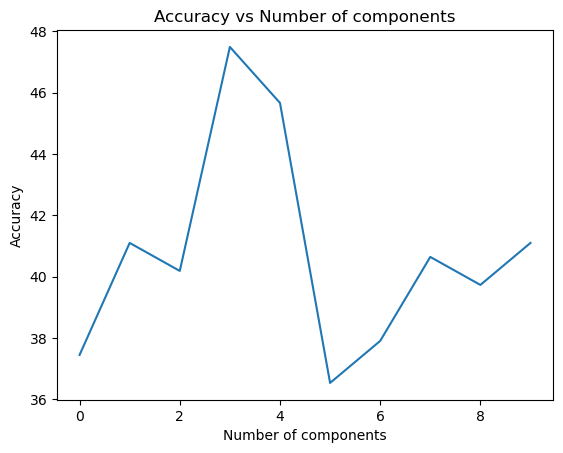

Best number of components: 4
Best accuracy: 47.48858447488584
Best precision: 25.452460053788954
Best recall: 24.54700854700855


In [31]:
# Evaluate Polynomial Kernel PCA + Minimum Distance Classifier performance
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
    # Initialize Kernel PCA with polynomial kernel and i+1 components
    kpca = KernelPCA(n_components=i + 1, kernel='poly')
    kpca.fit(x_train)

    # Transform training and test data using Polynomial Kernel PCA
    x_train_kpca = kpca.transform(x_train)
    x_test_kpca = kpca.transform(x_test)

    # Use minimum distance classifier to predict labels
    y_pred = mindisclassifier(x_train_kpca, y_train, x_test_kpca)

    # Calculate and store performance metrics (in percentage)
    acc.append(accuracy_score(y_test, y_pred) * 100)
    precision.append(precision_score(y_test, y_pred, average='macro', zero_division=0) * 100)
    recall.append(recall_score(y_test, y_pred, average='macro', zero_division=0) * 100)

# Plot accuracy vs number of components for Polynomial Kernel PCA
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()

# Print best results for Polynomial Kernel PCA
print(f"Best number of components: {acc.index(max(acc)) + 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

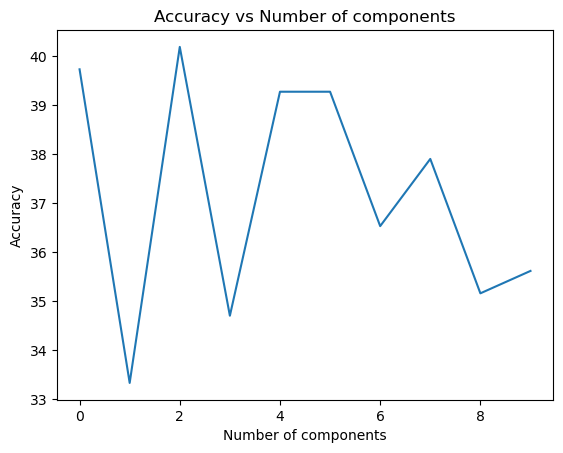

Best number of components: 3
Best accuracy: 40.182648401826484
Best precision: 20.23281621732554
Best recall: 20.41048741048741


In [32]:
# Evaluate Linear Kernel PCA + Minimum Distance Classifier performance
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
    # Initialize Kernel PCA with linear kernel and i+1 components
    kpca = KernelPCA(n_components=i + 1, kernel='linear')
    kpca.fit(x_train)

    # Transform training and test data using Linear Kernel PCA
    x_train_kpca = kpca.transform(x_train)
    x_test_kpca = kpca.transform(x_test)

    # Use minimum distance classifier to predict labels
    y_pred = mindisclassifier(x_train_kpca, y_train, x_test_kpca)

    # Calculate and store performance metrics (in percentage)
    acc.append(accuracy_score(y_test, y_pred) * 100)
    precision.append(precision_score(y_test, y_pred, average='macro', zero_division=0) * 100)
    recall.append(recall_score(y_test, y_pred, average='macro', zero_division=0) * 100)

# Plot accuracy vs number of components for Linear Kernel PCA
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
# Print best results for Linear Kernel PCA
print(f"Best number of components: {acc.index(max(acc)) + 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

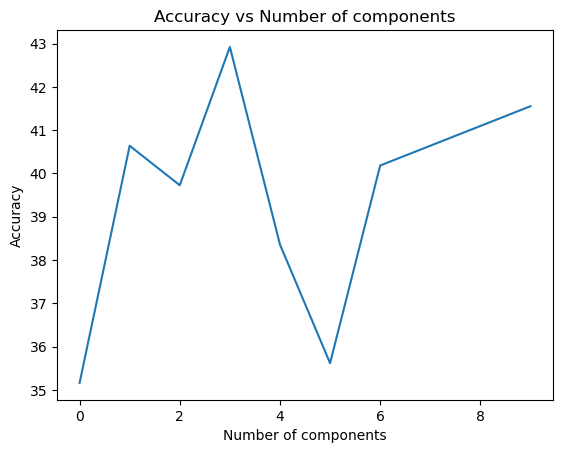

Best number of components: 4
Best accuracy: 42.922374429223744
Best precision: 22.189004554326612
Best recall: 21.859782859782857


In [33]:
# Evaluate Combined Kernel PCA + Minimum Distance Classifier performance
acc = []
precision = []
recall = []

for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
    # Use a custom combined_kpca function with specific parameters
    # This appears to combine multiple kernel types
    ckpca = combined_kpca(x_train, x_test, n_components=i+1, gamma=1, degree=2)

    # Use minimum distance classifier on the transformed data
    # Note: ckpca[0] is assumed to be transformed training data, ckpca[1] is transformed test data
    y_pred = mindisclassifier(ckpca[0], y_train, ckpca[1])

    # Calculate and store performance metrics (in percentage)
    acc.append(accuracy_score(y_test, y_pred) * 100)
    precision.append(precision_score(y_test, y_pred, average='macro', zero_division=0) * 100)
    recall.append(recall_score(y_test, y_pred, average='macro', zero_division=0) * 100)

# Plot accuracy vs number of components for Combined Kernel PCA
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()

# Print best results for Combined Kernel PCA
print(f"Best number of components: {acc.index(max(acc)) + 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

# NB For top_10_features


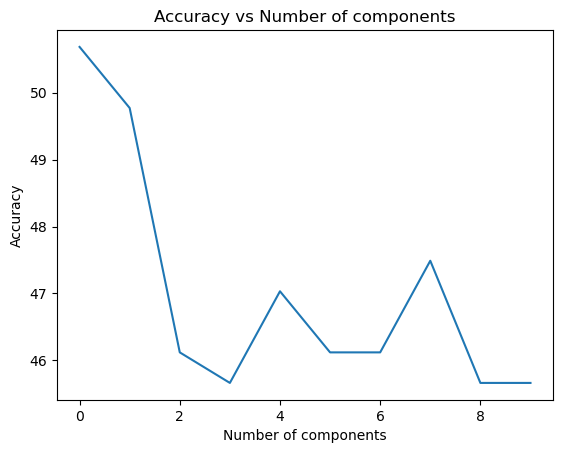

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [34]:
# I will use PCA + Naive Bayes | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  pca = PCA(n_components= i + 1)
  pca.fit(x_train)
  x_train_pca = pca.transform(x_train)
  x_test_pca = pca.transform(x_test)
  #train the Naive Bayes classifier on pc components
  NB = GaussianNB()
  # train your classifier
  NB.fit(x_train_pca,y_train) # this is how to train classifier
  y_pred = NB.predict(x_test_pca) # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

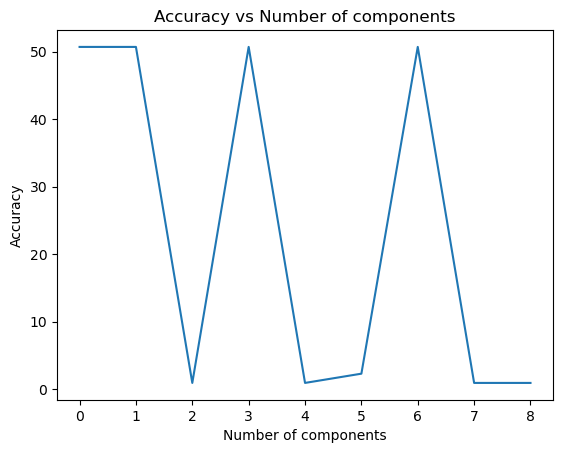

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [36]:
# I will use rbf_kpca + Naive Bayes | top_10_features
acc = []
precision = []
recall = []
for i in range(9):
  kpca = KernelPCA(n_components= i + 1, kernel='rbf')
  kpca.fit(x_train)
  x_train_kpca = kpca.transform(x_train)
  x_test_kpca = kpca.transform(x_test)
  #train the Naive Bayes classifier on rbf kpca components
  NB = GaussianNB()
  # train your classifier
  NB.fit(x_train_kpca,y_train) # this is how to train classifier
  y_pred = NB.predict(x_test_kpca) # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)

plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

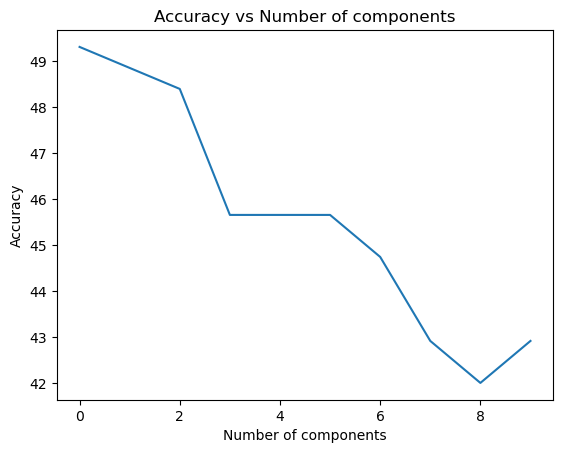

Best number of components: 1
Best accuracy: 49.31506849315068
Best precision: 10.093457943925232
Best recall: 19.45945945945946


In [37]:
# I will use polynimial kpca + Naive Bayes | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='poly')
  kpca.fit(x_train)
  x_train_kpca = kpca.transform(x_train)
  x_test_kpca = kpca.transform(x_test)
  #train the Naive Bayes classifier on polynimial kpca components
  NB = GaussianNB()
  # train your classifier
  NB.fit(x_train_kpca,y_train) # this is how to train classifier
  y_pred = NB.predict(x_test_kpca) # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)

plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

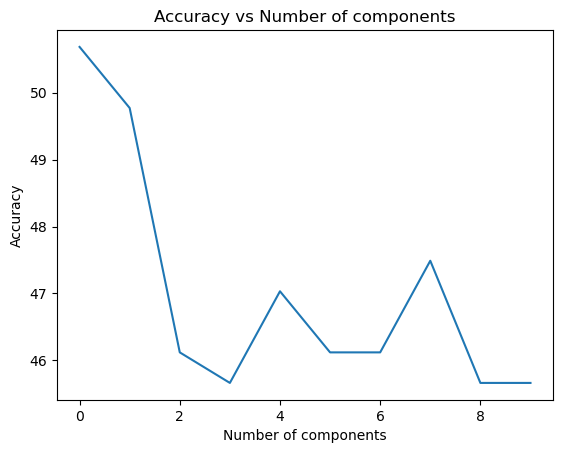

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [38]:
# I will use liner kpca  + Naive Bayes | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='linear')
  kpca.fit(x_train)
  x_train_kpca = kpca.transform(x_train)
  x_test_kpca = kpca.transform(x_test)
  #train the Naive Bayes classifier on linear kpca components
  NB = GaussianNB()
  # train your classifier
  NB.fit(x_train_kpca,y_train) # this is how to train classifier
  y_pred = NB.predict(x_test_kpca) # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)


plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

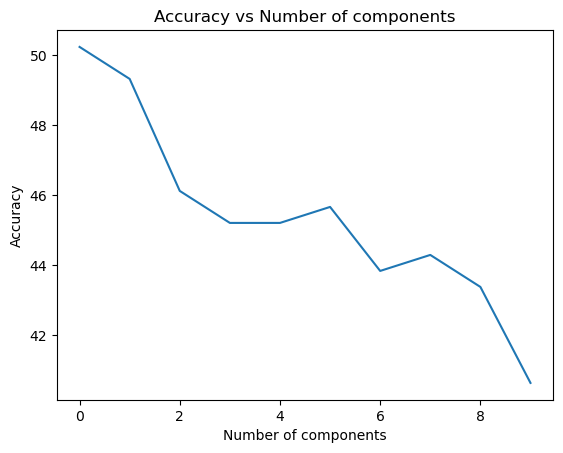

Best number of components: 1
Best accuracy: 50.2283105022831
Best precision: 10.185185185185187
Best recall: 19.81981981981982


In [39]:
#I will use combined kpca + Naive Bayes | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  ckpca = combined_kpca(x_train, x_test, n_components=i+1, gamma=1, degree=2)
  NB = GaussianNB()
  # train your classifier
  NB.fit(ckpca[0],y_train) # this is how to train classifier
  y_pred = NB.predict(ckpca[1]) # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")



# KNN top_10_features

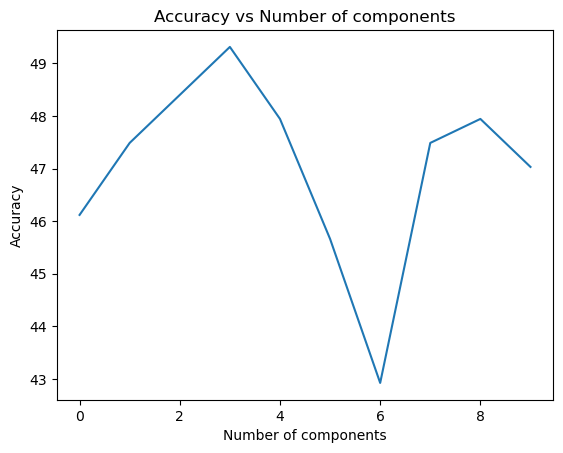

Best number of components: 4
Best accuracy: 49.31506849315068
Best precision: 17.318840579710145
Best recall: 20.734580734580735


In [40]:
# I will use PCA + KNN | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  pca = PCA(n_components= i + 1)
  pca.fit(x_train)
  x_train_pca = pca.transform(x_train)
  x_test_pca = pca.transform(x_test)
  #train the Naive Bayes classifier on pc components
  knn = KNeighborsClassifier(n_neighbors=10)
  knn.fit(x_train_pca, y_train) # this is how to train classifier
  y_pred = knn.predict(x_test_pca)  # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


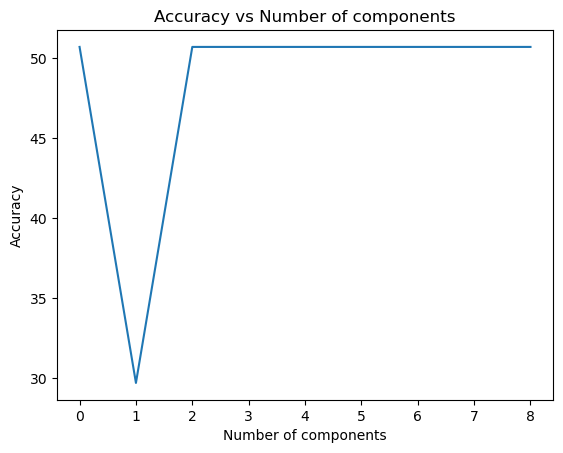

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [41]:
# I will use rbf kpca + knn | top_10_features
acc = []
precision = []
recall = []
for i in range(9):
  kpca = KernelPCA(n_components= i + 1, kernel='rbf' )
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the KNN classifier on rbf kernal components
  knn = KNeighborsClassifier(n_neighbors=10)
  knn.fit(x_train_pca, y_train) # this is how to train classifier
  y_pred = knn.predict(x_test_pca)  # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


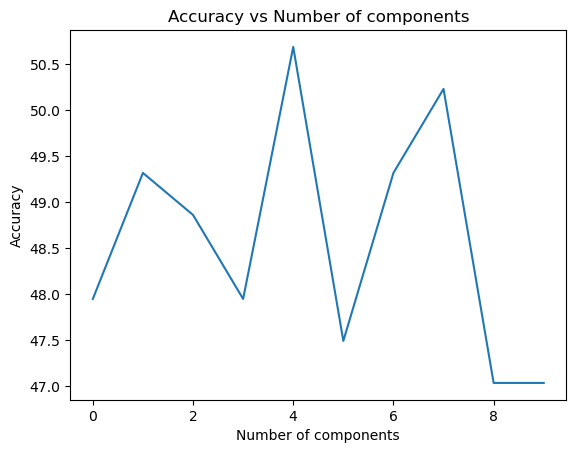

Best number of components: 5
Best accuracy: 50.68493150684932
Best precision: 17.60370519532823
Best recall: 21.14760914760915


In [42]:
#I will use polynimial kpca + knn | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='poly')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the KNN classifier on polynimial kernal components
  knn = KNeighborsClassifier(n_neighbors=10)
  knn.fit(x_train_pca, y_train) # this is how to train classifier
  y_pred = knn.predict(x_test_pca)  # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")



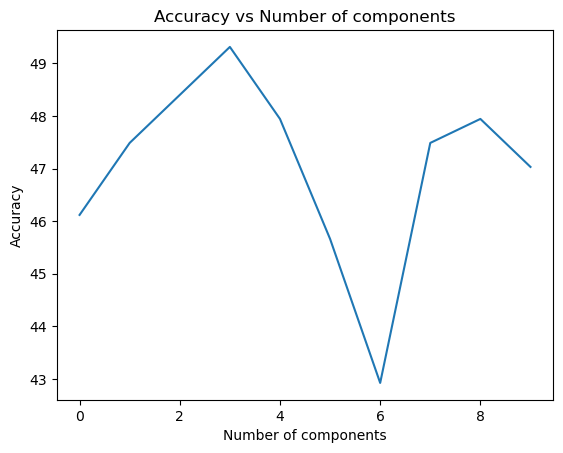

Best number of components: 4
Best accuracy: 49.31506849315068
Best precision: 17.318840579710145
Best recall: 20.734580734580735


In [43]:
#I will use liner kpca + knn | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='linear')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the KNN classifier on linear kernal components
  knn = KNeighborsClassifier(n_neighbors=10)
  knn.fit(x_train_pca, y_train) # this is how to train classifier
  y_pred = knn.predict(x_test_pca)  # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


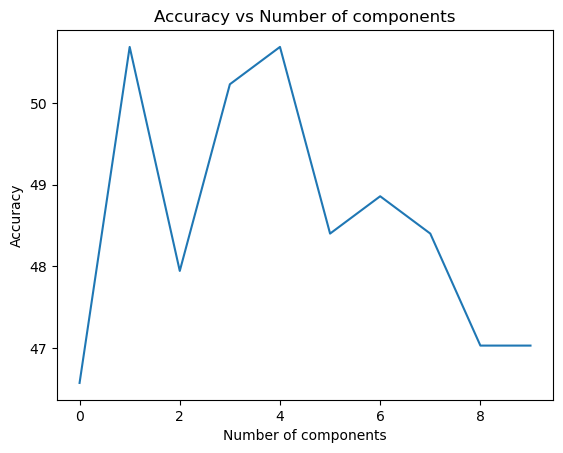

Best number of components: 2
Best accuracy: 50.68493150684932
Best precision: 22.581521739130434
Best recall: 21.395472395472392


In [44]:
#i will use combined kpca + knn | top 10 feature
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  ckpca = combined_kpca(x_train, x_test, n_components=i+1, gamma=1, degree=2)
  knn = KNeighborsClassifier(n_neighbors=10)
  knn.fit(ckpca[0], y_train) # this is how to train classifier
  y_pred = knn.predict(ckpca[1])  # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


# LDA top_10_features

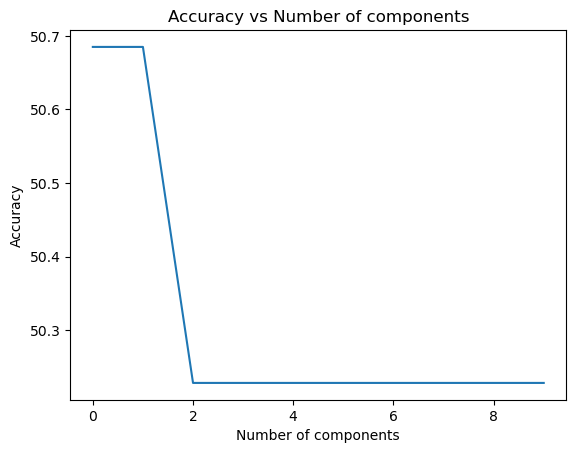

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [45]:
#I will use PCA + LDA | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  pca = PCA(n_components= i + 1)
  pca.fit(x_train)
  x_train_pca = pca.transform(x_train)
  x_test_pca = pca.transform(x_test)
  #train the LDA classifier
  LDA = LinearDiscriminantAnalysis()
  #train classifier
  LDA.fit(x_train_pca, y_train)# train data
  y_pred = LDA.predict(x_test_pca)# predict eh label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

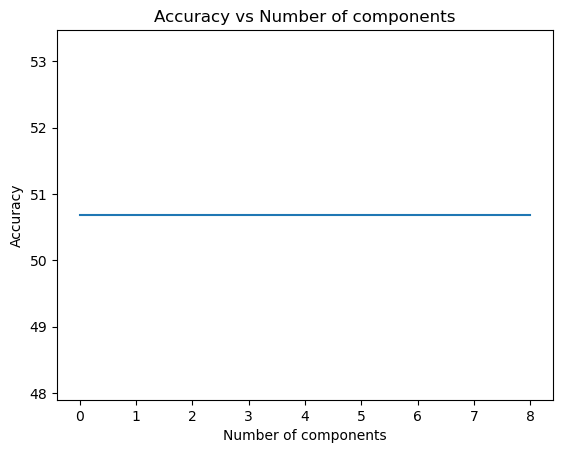

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [46]:
#i will use rbf kpca + LDA | top_10_features
acc = []
precision = []
recall = []
for i in range(9):
  kpca = KernelPCA(n_components= i + 1, kernel='rbf')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the LDA classifier
  LDA = LinearDiscriminantAnalysis()
  #train classifier
  LDA.fit(x_train_pca, y_train)# train data
  y_pred = LDA.predict(x_test_pca)# predict eh label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


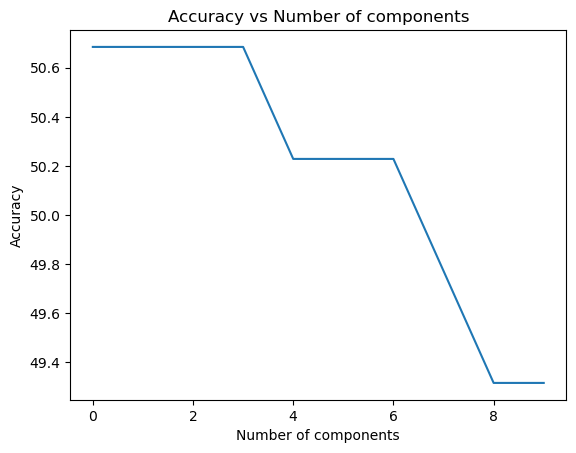

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [47]:
 #I will use polynimial kpca + LDA | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='poly')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the LDA classifier
  LDA = LinearDiscriminantAnalysis()
  #train classifier
  LDA.fit(x_train_pca, y_train)# train data
  y_pred = LDA.predict(x_test_pca)# predict eh label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


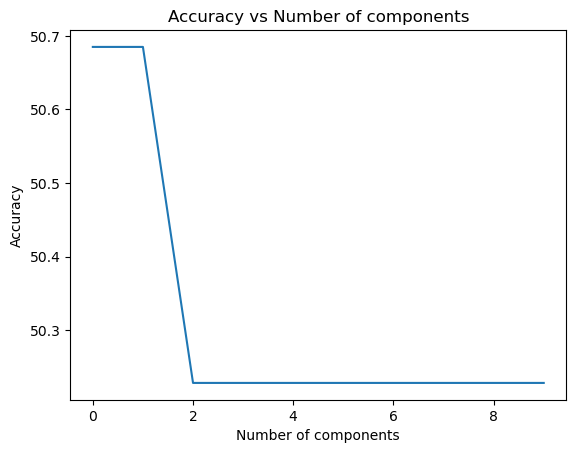

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [48]:
#I will use liner kpca + LDA | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='linear')
  kpca.fit(x_train)
  x_train_kpca = kpca.transform(x_train)
  x_test_kpca = kpca.transform(x_test)
  #train the LDA classifier
  LDA = LinearDiscriminantAnalysis()
  #train classifier
  LDA.fit(x_train_kpca, y_train)# train data
  y_pred = LDA.predict(x_test_kpca)# predict eh label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")




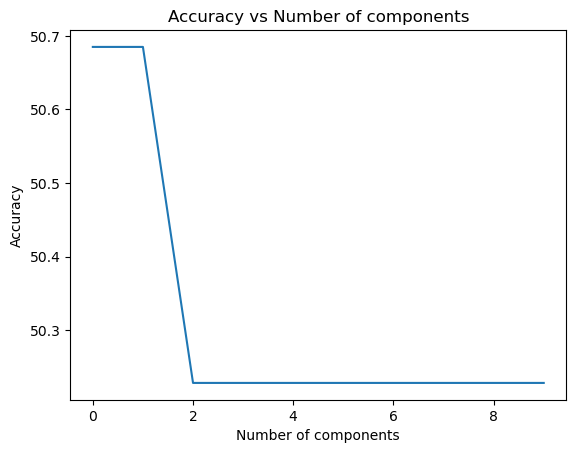

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [49]:
#i will use combined kpca + LDA | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  ckpca = combined_kpca(x_train, x_test, n_components=i+1, gamma=1, degree=2)
  LDA = LinearDiscriminantAnalysis()
  #train classifier
  LDA.fit(ckpca[0], y_train)# train data
  y_pred = LDA.predict(ckpca[1])# predict eh label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

# KDA Linear top_10_feature



C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warni

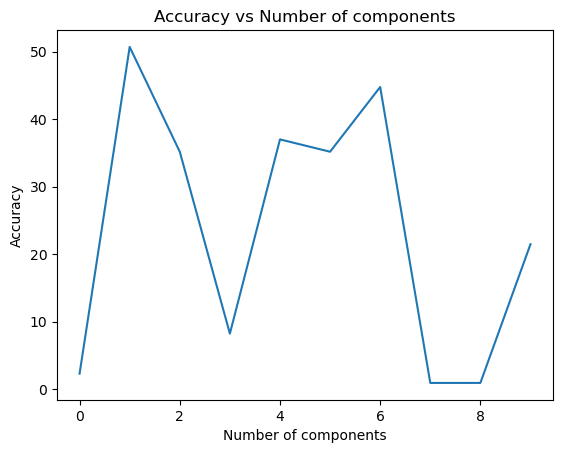

Best number of components: 2
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [50]:
# I will use pca + kda | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  pca = PCA(n_components= i + 1)
  pca.fit(x_train)
  x_train_pca = pca.transform(x_train)
  x_test_pca = pca.transform(x_test)
  #train the kda classifier on pc components
  cls = Kfda(n_components=i+1, kernel='linear')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(


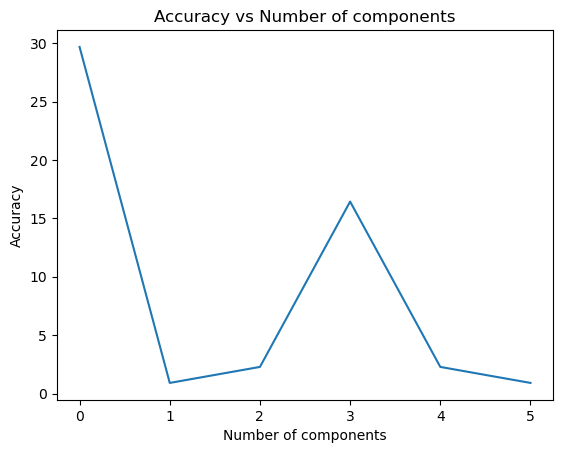

Best number of components: 1
Best accuracy: 29.68036529680365
Best precision: 5.93607305936073
Best recall: 20.0


In [51]:
# I will use rbf kpca + kda | top_10_features
acc = []
precision = []
recall = []
for i in range(6):
  kpca = KernelPCA(n_components= i + 1, kernel='rbf')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the kda
  cls = Kfda(n_components=i+1, kernel='linear')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warni

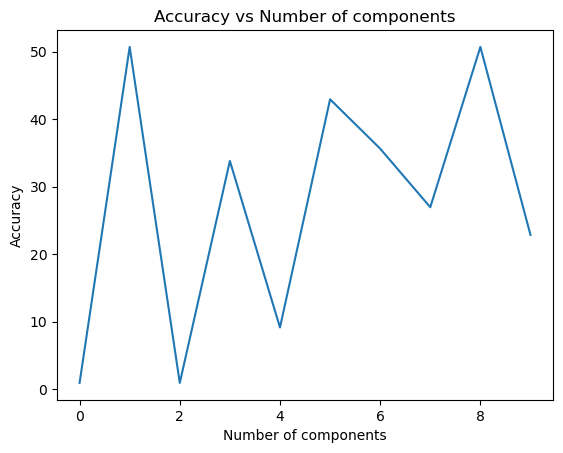

Best number of components: 2
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [52]:
# I will use polynimial kpca + kda | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='poly')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the kda
  cls = Kfda(n_components=i+1, kernel='linear')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warni

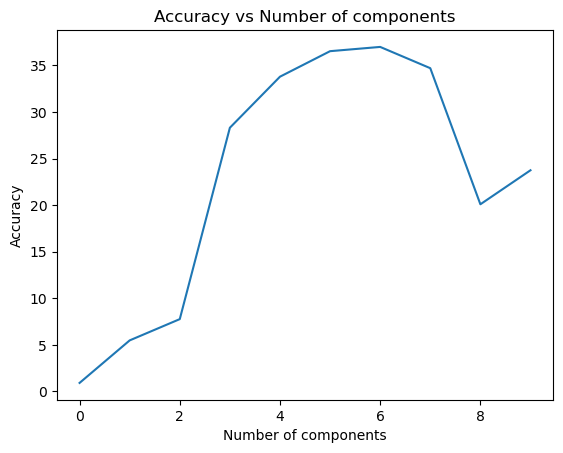

Best number of components: 7
Best accuracy: 36.986301369863014
Best precision: 16.850901036947548
Best recall: 19.695079695079695


In [53]:
# I will use linear kpca + kda | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='linear')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the kda
  cls = Kfda(n_components=i+1, kernel='linear')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warni

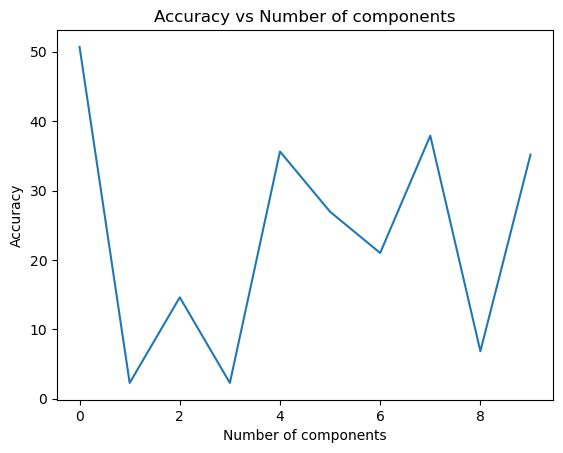

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [54]:
#I will use combined kpca + kda | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  ckpca = combined_kpca(x_train, x_test, n_components=i+1, gamma=1, degree=2)
  cls = Kfda(n_components=i+1, kernel='linear')
  cls.fit(ckpca[0], y_train)
  y_pred = cls.predict(ckpca[1])
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

# KDA Polynomials top_10_feature

C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warni

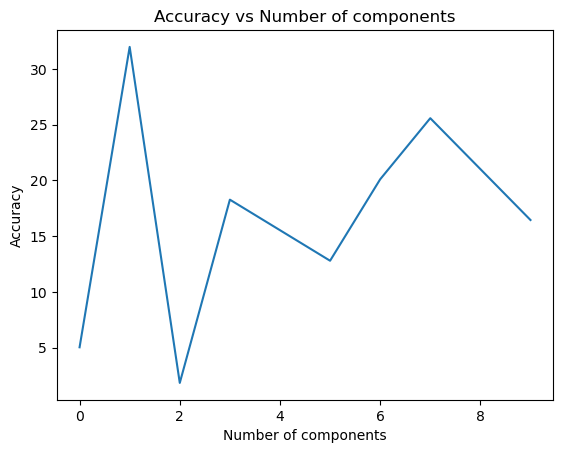

Best number of components: 2
Best accuracy: 31.963470319634702
Best precision: 15.532270759543486
Best recall: 24.684684684684687


In [55]:
# I will use pca + kda poly | top_10_features
acc = []
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  pca = PCA(n_components= i + 1)
  pca.fit(x_train)
  x_train_pca = pca.transform(x_train)
  x_test_pca = pca.transform(x_test)
  #train the kda classifier on pc components
  cls = Kfda(n_components=i+1, kernel='poly')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warni

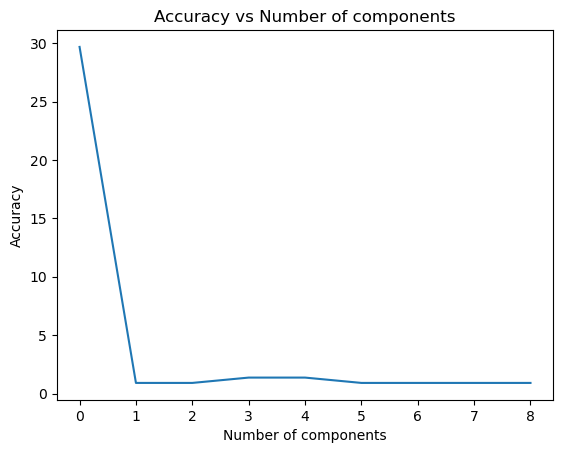

Best number of components: 1
Best accuracy: 29.68036529680365
Best precision: 5.93607305936073
Best recall: 20.0


In [57]:
# I will use rbf kpca + kda poly | top_10_features
acc = []
acc = []
precision = []
recall = []
for i in range(9):
  kpca = KernelPCA(n_components= i + 1, kernel='rbf')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the kda
  cls = Kfda(n_components=i+1, kernel='poly')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warni

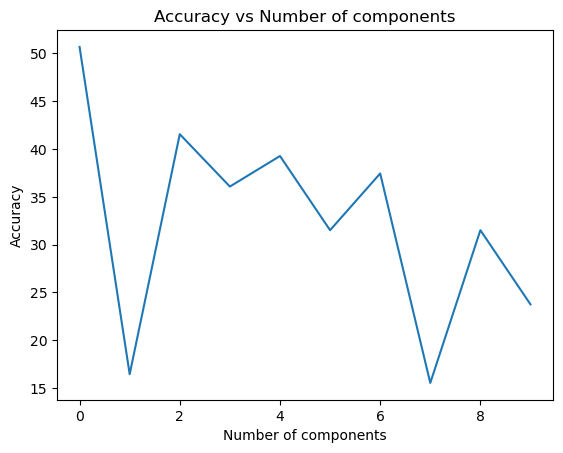

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [58]:
# I will use polynimial kpca + kda poly | top_10_features
acc = []
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='poly')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the kda
  cls = Kfda(n_components=i+1, kernel='poly')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warni

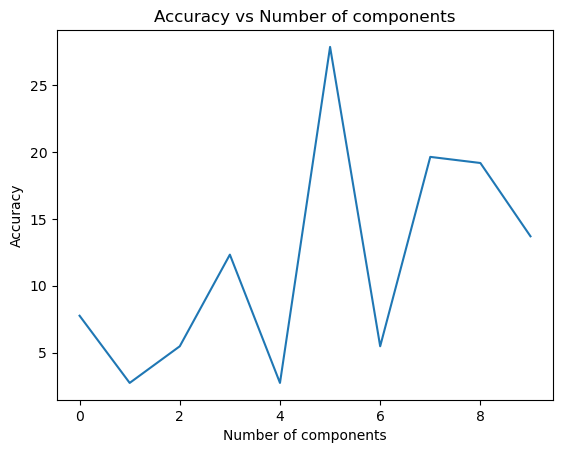

Best number of components: 6
Best accuracy: 27.85388127853881
Best precision: 18.009070294784582
Best recall: 15.14876414876415


In [59]:
# I will use linear kpca + kda poly | top_10_features
acc = []
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='linear')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the kda
  cls = Kfda(n_components=i+1, kernel='poly')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warni

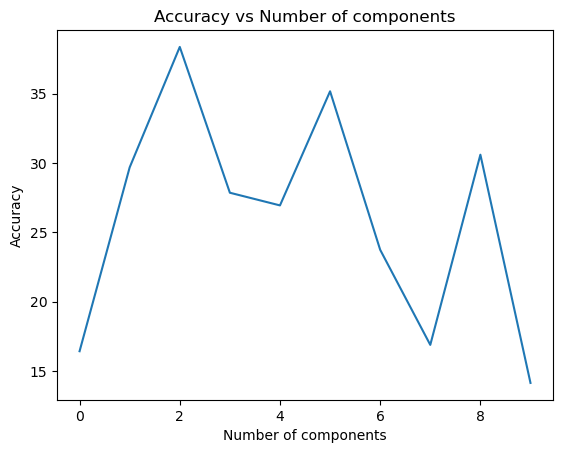

Best number of components: 3
Best accuracy: 38.35616438356164
Best precision: 13.690277003160439
Best recall: 16.02772002772003


In [60]:
#I will use combined kpca + kda poly | top_10_features
acc = []
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  ckpca = combined_kpca(x_train, x_test, n_components=i+1, gamma=1, degree=2)
  cls = Kfda(n_components=i+1, kernel='poly')
  cls.fit(ckpca[0], y_train)
  y_pred = cls.predict(ckpca[1])
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

# KDA RBF Top_10_feature

C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warni

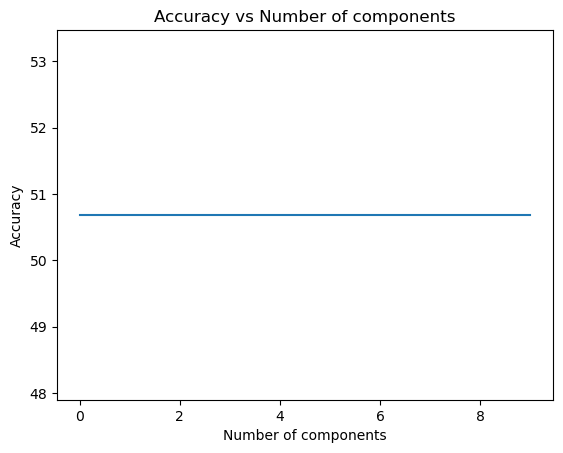

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [61]:
# I will use pca + kda RBF | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  pca = PCA(n_components= i + 1)
  pca.fit(x_train)
  x_train_pca = pca.transform(x_train)
  x_test_pca = pca.transform(x_test)
  #train the kda classifier on pc components
  cls = Kfda(n_components=i+1, kernel='rbf')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


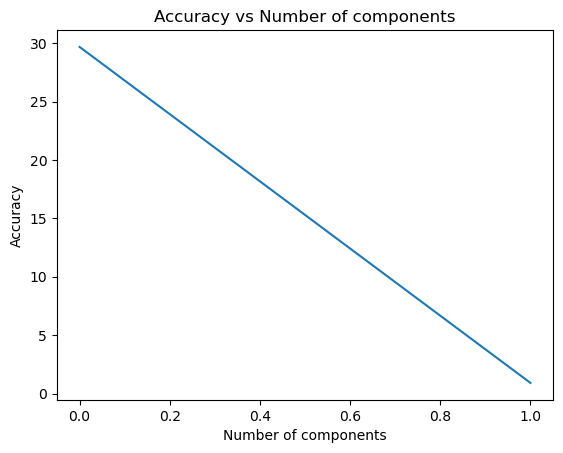

Best number of components: 1
Best accuracy: 29.68036529680365
Best precision: 5.93607305936073
Best recall: 20.0


In [62]:
acc = []
precision = []
recall = []
for i in range(2):
    kpca = KernelPCA(n_components=i + 1, kernel='rbf', gamma=0.1)
    kpca.fit(x_train)
    x_train_pca = kpca.transform(x_train)
    x_test_pca = kpca.transform(x_test)
    #train the kda
    cls = Kfda(n_components=1, kernel='rbf', robustness_offset=1e-5)  # Try reducing n_components
    cls.fit(x_train_pca, y_train)
    y_pred = cls.predict(x_test_pca)
    acc.append(accuracy_score(y_test, y_pred) * 100)
    precision.append(precision_score(y_test, y_pred, average='macro', zero_division=0) * 100)
    recall.append(recall_score(y_test, y_pred, average='macro', zero_division=0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")



C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warni

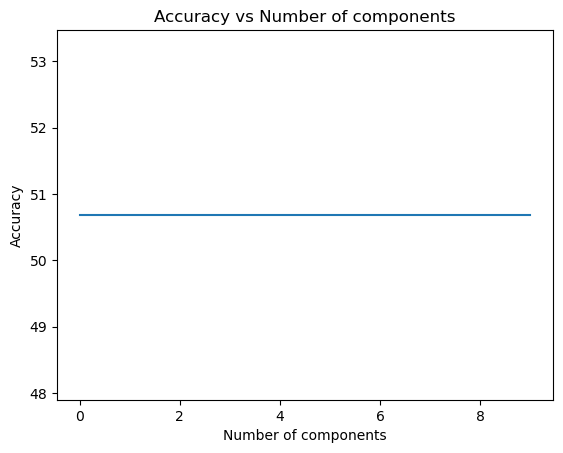

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [63]:
# I will use polynimial kpca + kda rbf | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='poly')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the kda
  cls = Kfda(n_components=i+1, kernel='rbf')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warni

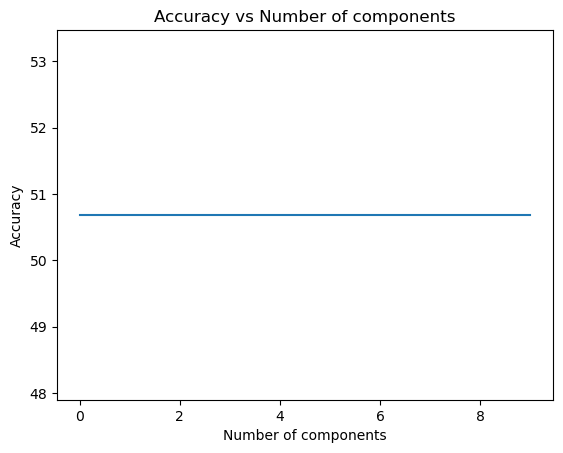

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [64]:
# I will use linear kpca + kda rbf | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='linear')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the kda
  cls = Kfda(n_components=i+1, kernel='rbf')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warnings.warn(
C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1552408330.py:29: UserWarning: n_components > min(classes_.size - 1, n_samples - 1). Only the first 4 components will be valid.
  warni

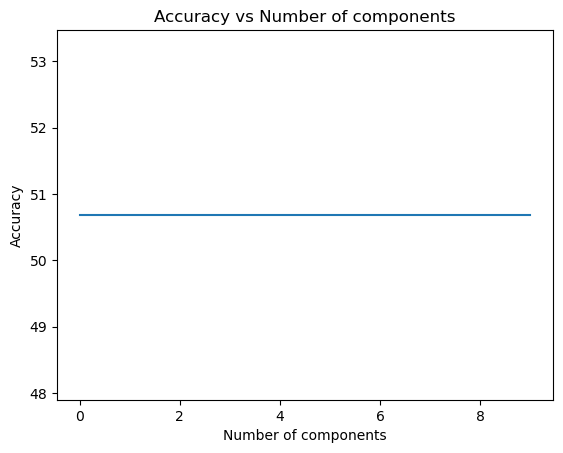

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [65]:
#I will use combined kpca + kda rbf | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  ckpca = combined_kpca(x_train, x_test, n_components=i+1, gamma=1, degree=2)
  cls = Kfda(n_components=i+1, kernel='rbf')
  cls.fit(ckpca[0], y_train)
  y_pred = cls.predict(ckpca[1])
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

# Bayes top_10_features


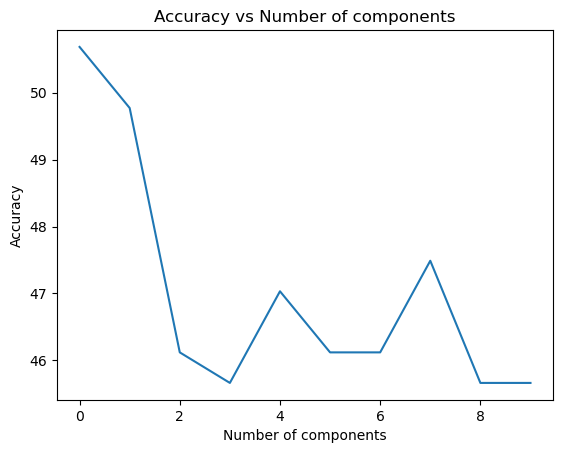

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [66]:
# I will use PCA + bayes classifier | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  pca = PCA(n_components= i + 1)
  pca.fit(x_train)
  x_train_pca = pca.transform(x_train)
  x_test_pca = pca.transform(x_test)
  #train the Naive Bayes classifier on pc components
  B = BayesClassifier()
  B.fit(x_train_pca, y_train)
  y_pred = B.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


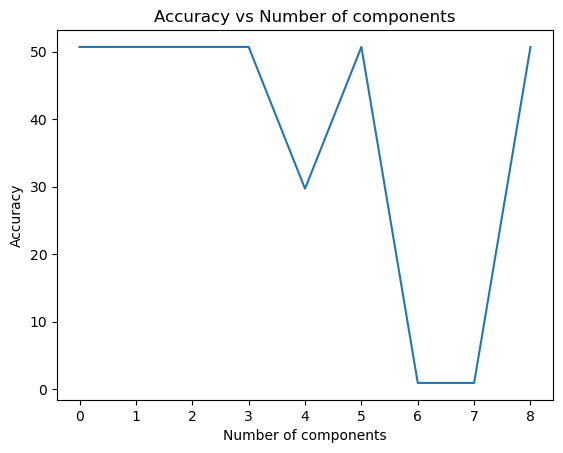

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [67]:
# I will use rbf kpca + bayes classifier | top_10_features
acc = []
precision = []
recall = []
for i in range(9):
  kpca = KernelPCA(n_components= i + 1, kernel='rbf')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the Naive Bayes classifier on pc components
  B = BayesClassifier()
  B.fit(x_train_pca, y_train)
  y_pred = B.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

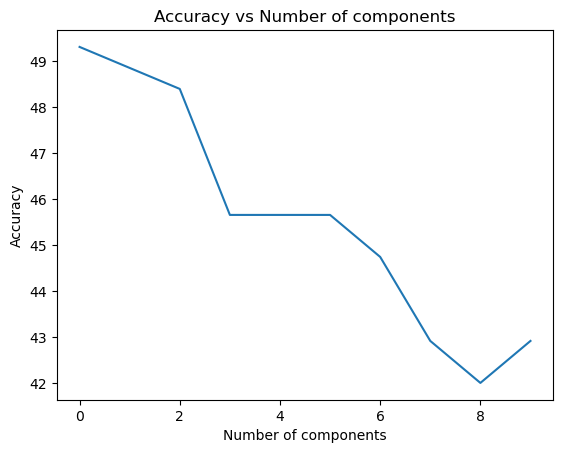

Best number of components: 1
Best accuracy: 49.31506849315068
Best precision: 10.093457943925232
Best recall: 19.45945945945946


In [68]:
#I will use polynimial kpca + bayes classifier | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='poly')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the Naive Bayes
  B = BayesClassifier()
  B.fit(x_train_pca, y_train)
  y_pred = B.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")



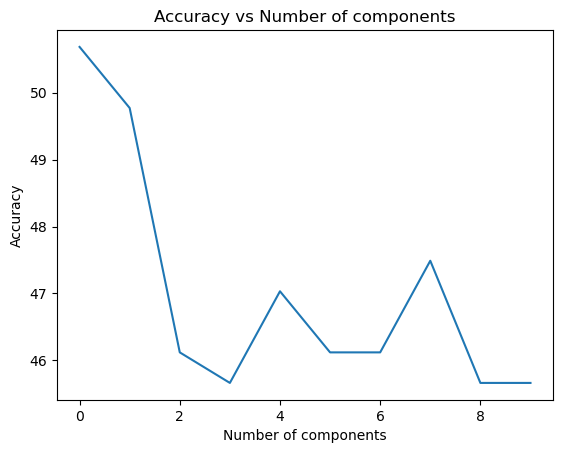

Best number of components: 1
Best accuracy: 50.68493150684932
Best precision: 10.136986301369863
Best recall: 20.0


In [69]:
# I will use liner kpca + bayes classifier | top_10_features
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='linear')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the Naive Bayes
  B = BayesClassifier()
  B.fit(x_train_pca, y_train)
  y_pred = B.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

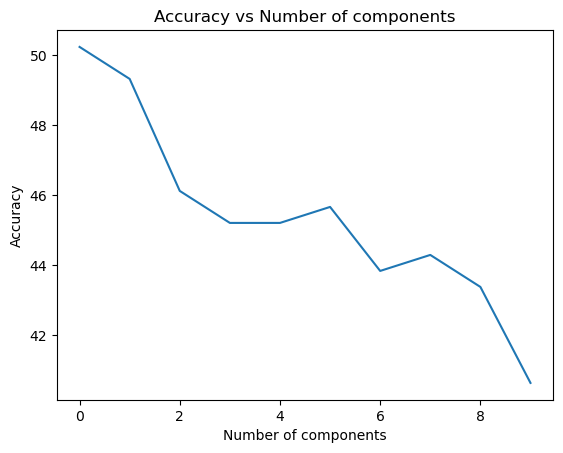

Best number of components: 1
Best accuracy: 50.2283105022831
Best precision: 10.185185185185187
Best recall: 19.81981981981982


In [70]:
#I will use combined kpca + bayes classifier
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  ckpca = combined_kpca(x_train, x_test, n_components=i+1, gamma=1, degree=2)
  B = BayesClassifier()
  B.fit(ckpca[0], y_train)
  y_pred = B.predict(ckpca[1])
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


In [71]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

# mindisclassifier classifiers on: - Whole data - Data reduced by PCA - Data reduced by KPCA with RBF, Polynomial, and Linear kernels

In [72]:
#I use whole data without dimensionality reduction
y_pred = mindisclassifier(x_train,y_train,x_test)
print(accuracy_score(y_test,y_pred) * 100)

35.61643835616438


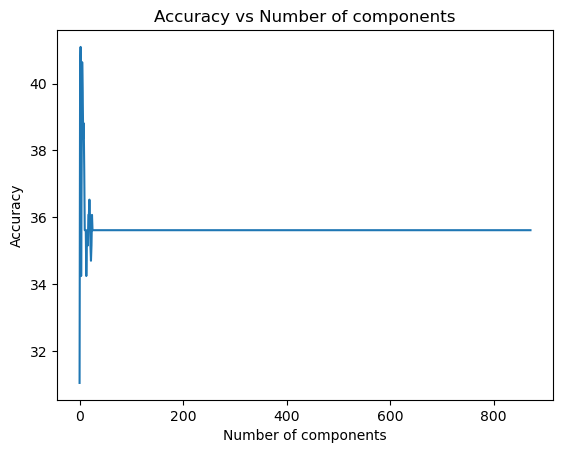

Best number of components: 3
Best accuracy: 41.0958904109589
Best precision: 20.80569518468935
Best recall: 20.830706179066834


In [73]:
#I will use PCA + mindisclassifier
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  pca = PCA(n_components= i + 1)
  pca.fit(x_train)
  x_train_pca = pca.transform(x_train)
  x_test_pca = pca.transform(x_test)
  y_pred = mindisclassifier(x_train_pca,y_train,x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

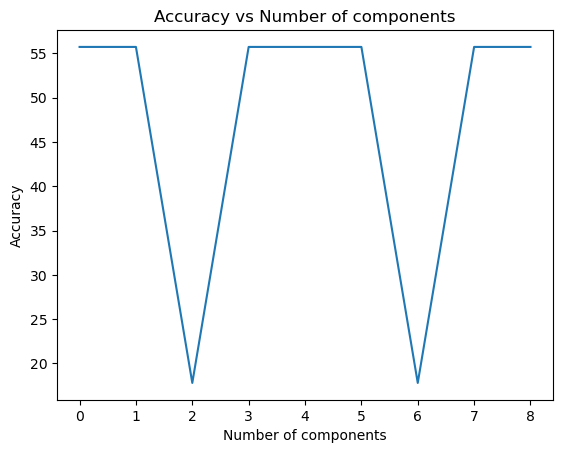

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [74]:
#I will use rbf_kpca + mindisclassifier
acc = []
precision = []
recall = []
for i in range(9):
  kpca = KernelPCA(n_components= i + 1, kernel='rbf')
  kpca.fit(x_train)
  x_train_kpca = kpca.transform(x_train)
  x_test_kpca = kpca.transform(x_test)
  y_pred = mindisclassifier(x_train_kpca,y_train,x_test_kpca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


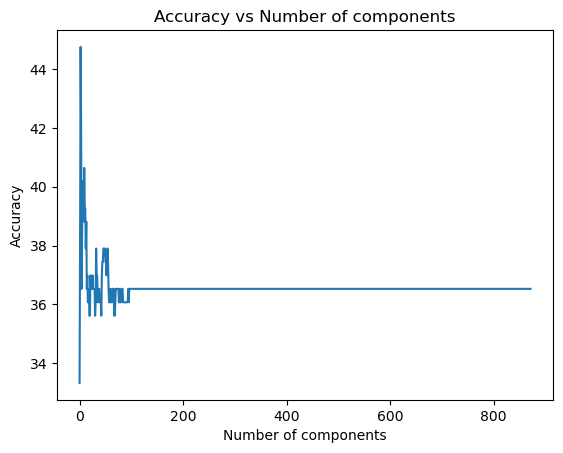

Best number of components: 3
Best accuracy: 44.74885844748858
Best precision: 22.372179847789912
Best recall: 23.62284573350147


In [75]:
#I will use polynimial kpca + mindisclassifier
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='poly')
  kpca.fit(x_train)
  x_train_kpca = kpca.transform(x_train)
  x_test_kpca = kpca.transform(x_test)
  y_pred = mindisclassifier(x_train_kpca,y_train,x_test_kpca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")



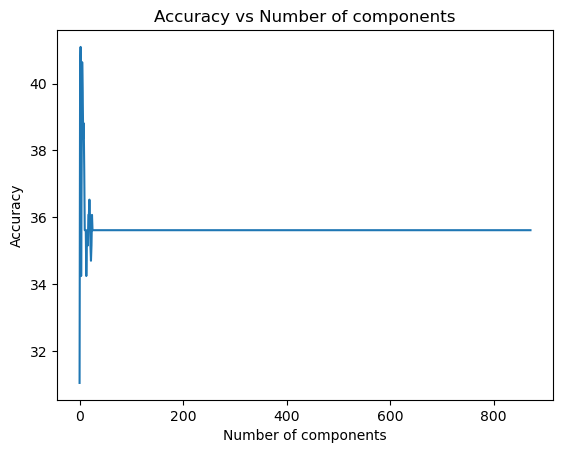

Best number of components: 3
Best accuracy: 41.0958904109589
Best precision: 20.80569518468935
Best recall: 20.830706179066834


In [76]:
#I will use liner kpca + mindisclassifier
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='linear')
  kpca.fit(x_train)
  x_train_kpca = kpca.transform(x_train)
  x_test_kpca = kpca.transform(x_test)
  y_pred = mindisclassifier(x_train_kpca,y_train,x_test_kpca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

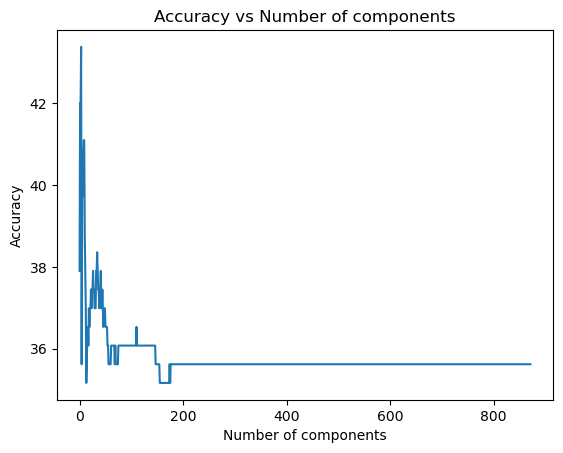

Best number of components: 4
Best accuracy: 43.37899543378995
Best precision: 22.11836992861661
Best recall: 21.903110550651533


In [77]:
#i will use combined kpca + mindisclassifier
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  ckpca = combined_kpca(x_train, x_test, n_components=i+1, gamma=1, degree=2)
  y_pred = mindisclassifier(ckpca[0],y_train,ckpca[1])
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")



#  NB classifiers on: - Whole data - Data reduced by PCA - Data reduced by KPCA with RBF, Polynomial, and Linear kernels


In [78]:
# used whole data without dimensionality reduction
NB = GaussianNB()
#train your classifier
NB.fit(x_train,y_train)
y_pred = NB.predict(x_test) # this is how train classifier
print(accuracy_score(y_test,y_pred) * 100) # preict the labes fo the test data

8.67579908675799


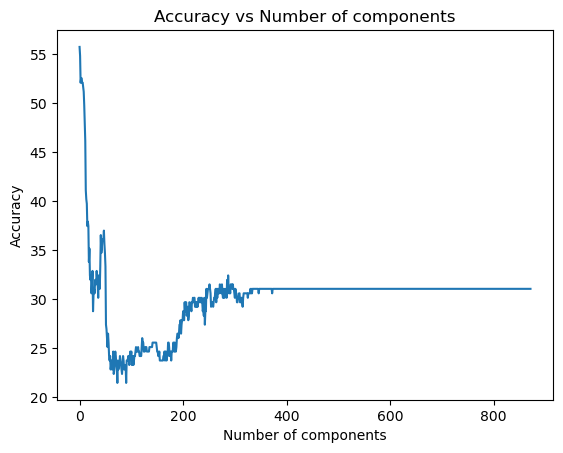

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [79]:
# I will use PCA + Naive Bayes
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  pca = PCA(n_components= i + 1)
  pca.fit(x_train)
  x_train_pca = pca.transform(x_train)
  x_test_pca = pca.transform(x_test)
  #train the Naive Bayes classifier on pc components
  NB = GaussianNB()
  # train your classifier
  NB.fit(x_train_pca,y_train) # this is how to train classifier
  y_pred = NB.predict(x_test_pca) # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

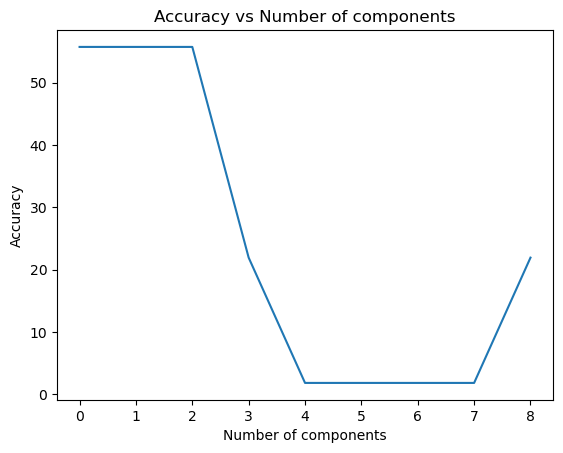

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [80]:
# I will use rbf_kpca + Naive Bayes
acc = []
precision = []
recall = []
for i in range(9):
  kpca = KernelPCA(n_components= i + 1, kernel='rbf')
  kpca.fit(x_train)
  x_train_kpca = kpca.transform(x_train)
  x_test_kpca = kpca.transform(x_test)
  #train the Naive Bayes classifier on rbf kpca components
  NB = GaussianNB()
  # train your classifier
  NB.fit(x_train_kpca,y_train) # this is how to train classifier
  y_pred = NB.predict(x_test_kpca) # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)

plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

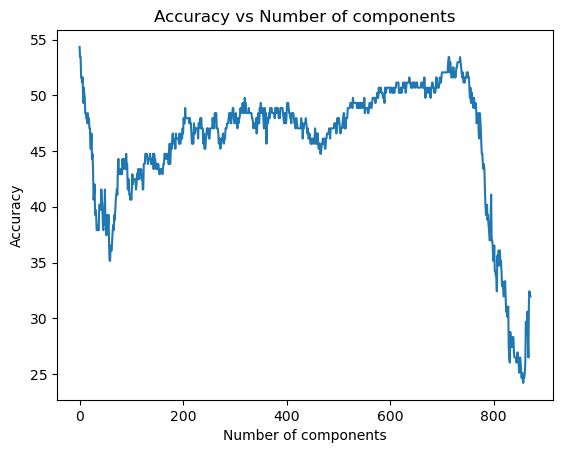

Best number of components: 1
Best accuracy: 54.337899543378995
Best precision: 11.121495327102803
Best recall: 19.508196721311474


In [81]:
# I will use polynimial kpca + Naive Bayes
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='poly')
  kpca.fit(x_train)
  x_train_kpca = kpca.transform(x_train)
  x_test_kpca = kpca.transform(x_test)
  #train the Naive Bayes classifier on polynimial kpca components
  NB = GaussianNB()
  # train your classifier
  NB.fit(x_train_kpca,y_train) # this is how to train classifier
  y_pred = NB.predict(x_test_kpca) # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)

plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

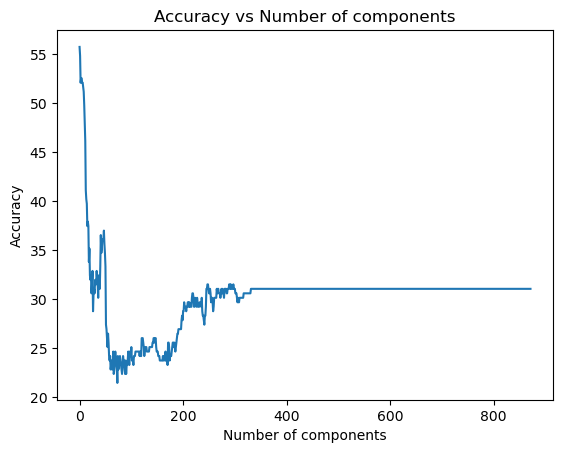

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [82]:
# I will use liner kpca  + Naive Bayes
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='linear')
  kpca.fit(x_train)
  x_train_kpca = kpca.transform(x_train)
  x_test_kpca = kpca.transform(x_test)
  #train the Naive Bayes classifier on linear kpca components
  NB = GaussianNB()
  # train your classifier
  NB.fit(x_train_kpca,y_train) # this is how to train classifier
  y_pred = NB.predict(x_test_kpca) # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)

plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

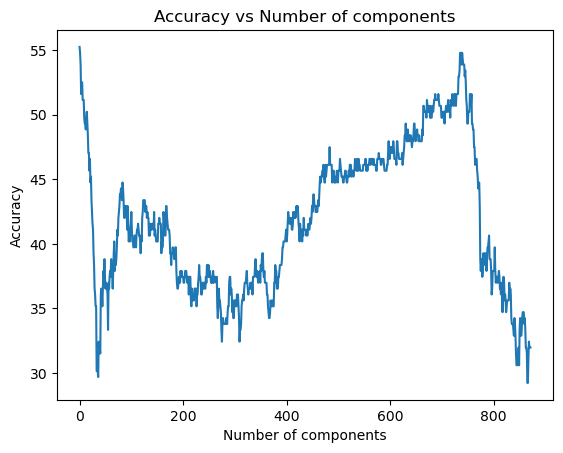

Best number of components: 1
Best accuracy: 55.25114155251142
Best precision: 11.152073732718895
Best recall: 19.836065573770494


In [83]:
# i will use combined kpca + Naive Bayes
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  ckpca = combined_kpca(x_train, x_test, n_components=i+1, gamma=1, degree=2)
  NB = GaussianNB()
  # train your classifier
  NB.fit(ckpca[0],y_train) # this is how to train classifier
  y_pred = NB.predict(ckpca[1]) # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


# knn classifiers on: - Whole data - Data reduced by PCA - Data reduced by KPCA with RBF, Polynomial, and Linear kernels


In [84]:
# use KNN + whole data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train) # this is how to train classifier
y_pred = knn.predict(x_test)  # predict the label of the test data
print(accuracy_score(y_test,y_pred) * 100)

46.57534246575342


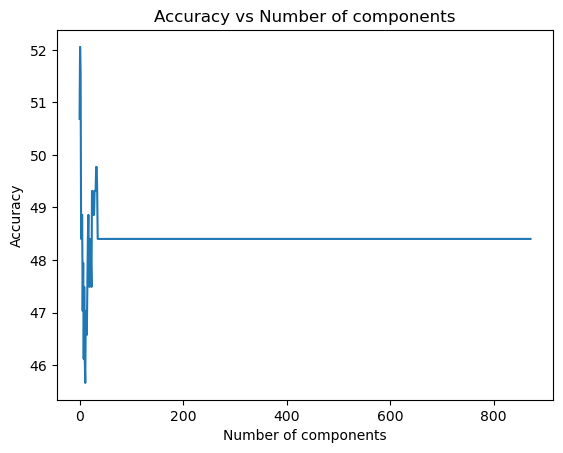

Best number of components: 2
Best accuracy: 52.054794520547944
Best precision: 16.231843575418996
Best recall: 20.96311475409836


In [85]:
# I will use PCA + KNN
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  pca = PCA(n_components= i + 1)
  pca.fit(x_train)
  x_train_pca = pca.transform(x_train)
  x_test_pca = pca.transform(x_test)
  #train the Naive Bayes classifier on pc components
  knn = KNeighborsClassifier(n_neighbors=10)
  knn.fit(x_train_pca, y_train) # this is how to train classifier
  y_pred = knn.predict(x_test_pca)  # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


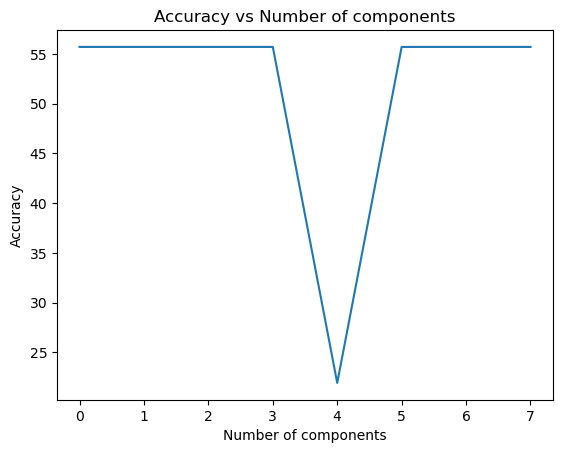

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [86]:
# I will use rbf kpca + knn
acc = []
precision = []
recall = []
for i in range(8):
  kpca = KernelPCA(n_components= i + 1, kernel='rbf')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the KNN classifier on rbf kernal components
  knn = KNeighborsClassifier(n_neighbors= 10)
  knn.fit(x_train_pca, y_train) # this is how to train classifier
  y_pred = knn.predict(x_test_pca)  # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


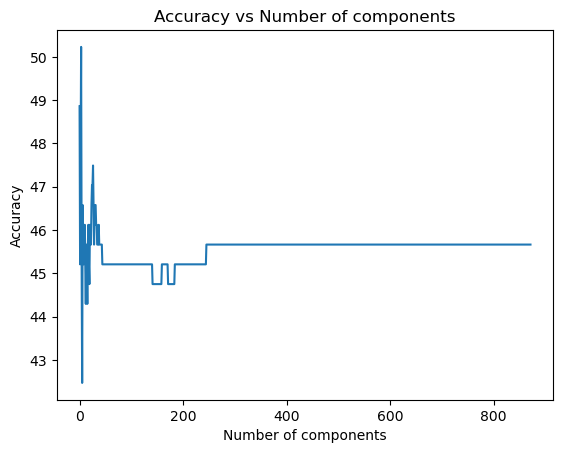

Best number of components: 4
Best accuracy: 50.2283105022831
Best precision: 20.11160657408587
Best recall: 20.908995376208487


In [87]:
#I will use polynimial kpca + knn
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='poly')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the KNN classifier on polynimial kernal components
  knn = KNeighborsClassifier(n_neighbors=10)
  knn.fit(x_train_pca, y_train) # this is how to train classifier
  y_pred = knn.predict(x_test_pca)  # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")



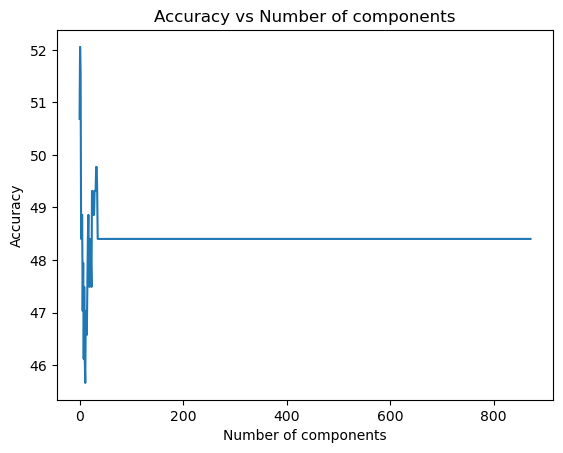

Best number of components: 2
Best accuracy: 52.054794520547944
Best precision: 16.231843575418996
Best recall: 20.96311475409836


In [88]:
#I will use liner kpca + knn
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='linear')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the KNN classifier on linear kernal components
  knn = KNeighborsClassifier(n_neighbors=10)
  knn.fit(x_train_pca, y_train) # this is how to train classifier
  y_pred = knn.predict(x_test_pca)  # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


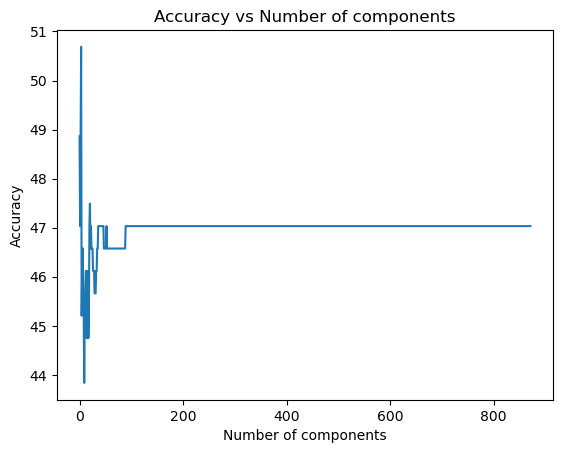

Best number of components: 4
Best accuracy: 50.68493150684932
Best precision: 15.606984478935699
Best recall: 20.21857923497268


In [89]:
#i will use combined kpca + knn
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  ckpca = combined_kpca(x_train, x_test, n_components=i+1, gamma=1, degree=2)
  knn = KNeighborsClassifier(n_neighbors=10)
  knn.fit(ckpca[0], y_train) # this is how to train classifier
  y_pred = knn.predict(ckpca[1])  # predict the label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


# LDA normal datalassifiers on: - Whole data - Data reduced by PCA - Data reduced by KPCA with RBF, Polynomial, and Linear kernels

In [90]:
#LDA with whole data
LDA = LinearDiscriminantAnalysis()
#train classifier
LDA.fit(x_train, y_train)# train data
y_pred = LDA.predict(x_test)# predict eh label of the test data
print(accuracy_score(y_test,y_pred) * 100)

35.15981735159817


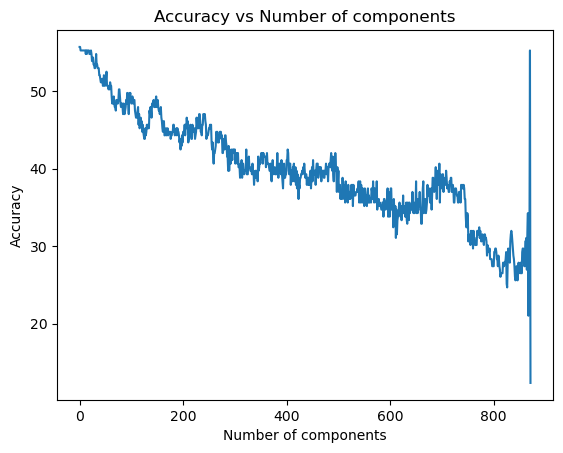

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [91]:
#I will use PCA + LDA
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  pca = PCA(n_components= i + 1)
  pca.fit(x_train)
  x_train_pca = pca.transform(x_train)
  x_test_pca = pca.transform(x_test)
  #train the LDA classifier
  LDA = LinearDiscriminantAnalysis()
  #train classifier
  LDA.fit(x_train_pca, y_train)# train data
  y_pred = LDA.predict(x_test_pca)# predict eh label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

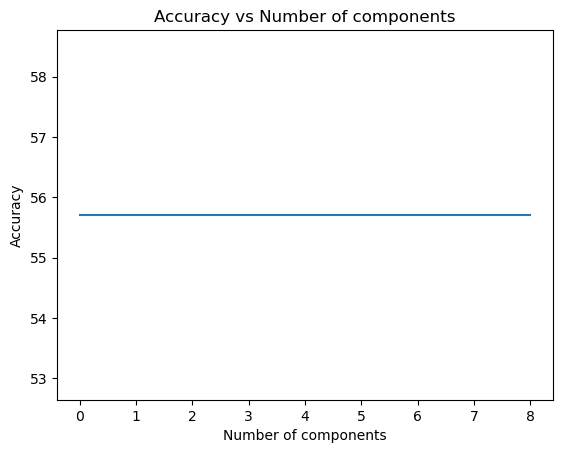

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [93]:
#i will use rbf kpca + LDA
acc = []
precision = []
recall = []
for i in range(9):
  kpca = KernelPCA(n_components= i + 1, kernel='rbf')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the LDA classifier
  LDA = LinearDiscriminantAnalysis()
  #train classifier
  LDA.fit(x_train_pca, y_train)# train data
  y_pred = LDA.predict(x_test_pca)# predict eh label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


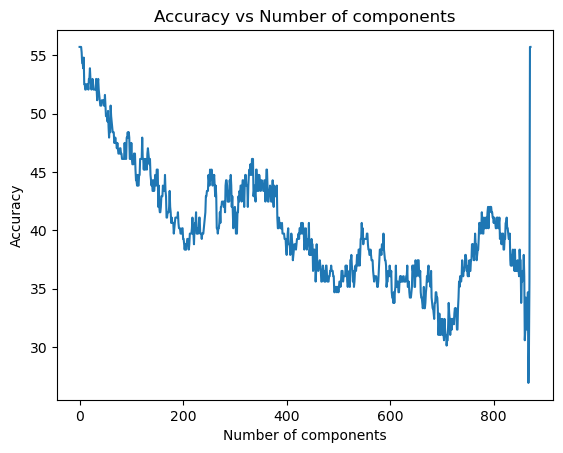

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [94]:
 #I will use polynimial kpca + LDA
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='poly')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the LDA classifier
  LDA = LinearDiscriminantAnalysis()
  #train classifier
  LDA.fit(x_train_pca, y_train)# train data
  y_pred = LDA.predict(x_test_pca)# predict eh label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


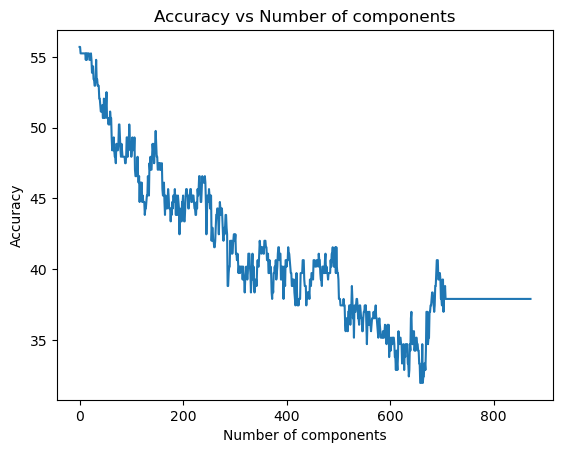

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [95]:
#I will use liner kpca + LDA
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='linear')
  kpca.fit(x_train)
  x_train_kpca = kpca.transform(x_train)
  x_test_kpca = kpca.transform(x_test)
  #train the LDA classifier
  LDA = LinearDiscriminantAnalysis()
  #train classifier
  LDA.fit(x_train_kpca, y_train)# train data
  y_pred = LDA.predict(x_test_kpca)# predict eh label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")




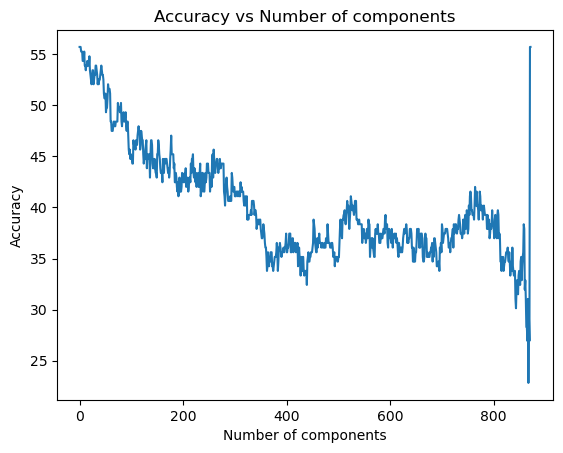

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [96]:
# i will use combined kpca + LDA
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  ckpca = combined_kpca(x_train, x_test, n_components=i+1, gamma=1, degree=2)
  LDA = LinearDiscriminantAnalysis()
  #train classifier
  LDA.fit(ckpca[0], y_train)# train data
  y_pred = LDA.predict(ckpca[1])# predict eh label of the test data
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
  #Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

# Bayes Classifier classifiers on: - Whole data - Data reduced by PCA - Data reduced by KPCA with RBF, Polynomial, and Linear kernels


In [97]:
# Whole data bayes classifier
B = BayesClassifier()
B.fit(x_train, y_train)
y_pred = B.predict(x_test)
print(accuracy_score(y_test,y_pred) * 100)

22.37442922374429


C:\Users\Shahed ahmed\AppData\Local\Temp\ipykernel_10320\1121524817.py:48: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self._caculate_likelihood(self.mean[idx,:], self.variance[idx, :], x)), axis= 1)


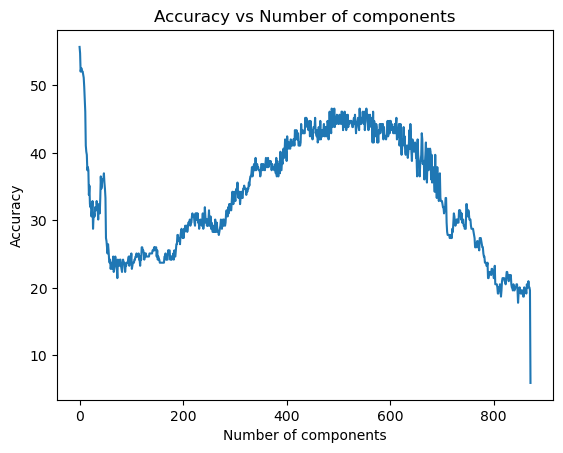

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [126]:
# I will use PCA + bayes classifier
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  pca = PCA(n_components= i + 1)
  pca.fit(x_train)
  x_train_pca = pca.transform(x_train)
  x_test_pca = pca.transform(x_test)
  #train the Naive Bayes classifier on pc components
  B = BayesClassifier()
  warnings.filterwarnings('ignore')
  B.fit(x_train_pca, y_train)
  y_pred = B.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


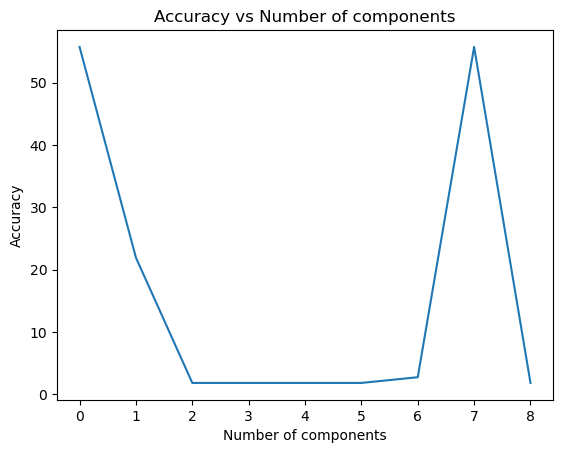

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [99]:
# I will use rbf kpca + bayes classifier
acc = []
precision = []
recall = []
for i in range(9):
  kpca = KernelPCA(n_components= i + 1, kernel='rbf')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the Naive Bayes
  B = BayesClassifier()
  B.fit(x_train_pca, y_train)
  y_pred = B.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

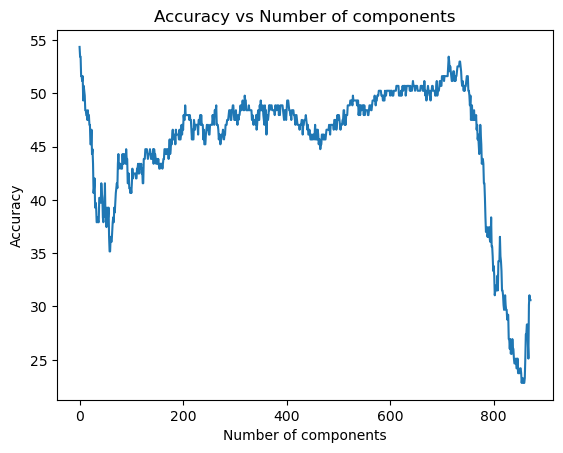

Best number of components: 1
Best accuracy: 54.337899543378995
Best precision: 11.121495327102803
Best recall: 19.508196721311474


In [101]:
#I will use polynimial kpca + bayes classifier
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='poly')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the Naive Bayes
  B = BayesClassifier()
  warnings.filterwarnings('ignore')
  B.fit(x_train_pca, y_train)
  y_pred = B.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")



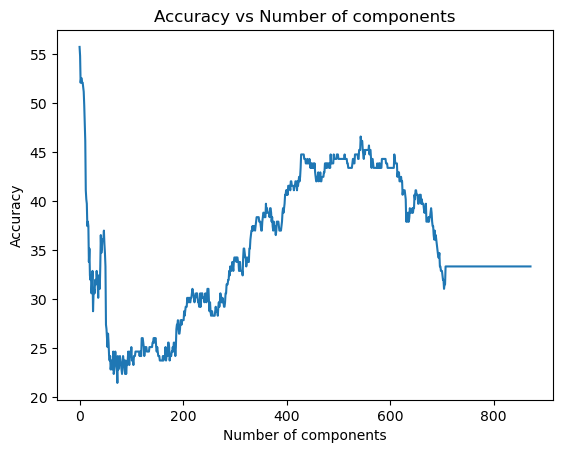

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [102]:
# I will use liner kpca + bayes classifier
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='linear')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the Naive Bayes
  B = BayesClassifier()
  warnings.filterwarnings('ignore')
  B.fit(x_train_pca, y_train)
  y_pred = B.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

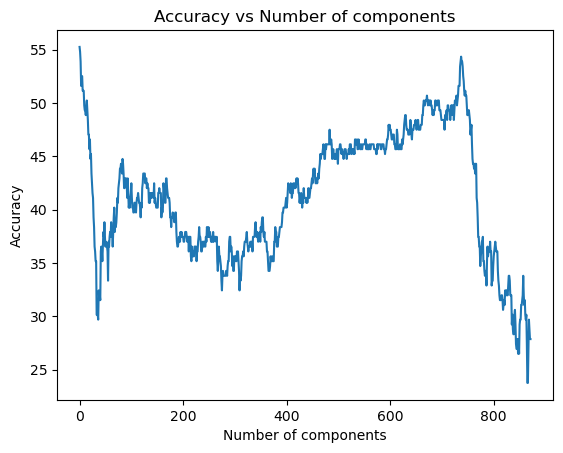

Best number of components: 1
Best accuracy: 55.25114155251142
Best precision: 11.152073732718895
Best recall: 19.836065573770494


In [103]:
#I will use combined kpca + bayes classifier
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  ckpca = combined_kpca(x_train, x_test, n_components=i+1, gamma=1, degree=2)
  B = BayesClassifier()
  warnings.filterwarnings('ignore')
  B.fit(ckpca[0], y_train)
  y_pred = B.predict(ckpca[1])
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


# KDA with linear classifiers on: - Whole data - Data reduced by PCA - Data reduced by KPCA with RBF, Polynomial, and Linear kernels

In [104]:
# Whole data kda linear
cls = Kfda(n_components= 4, kernel='linear')
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)
print(accuracy_score(y_test,y_pred) * 100)




22.831050228310502


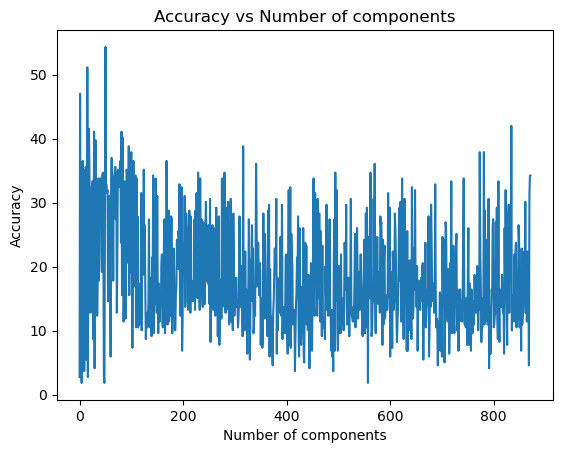

Best number of components: 51
Best accuracy: 54.337899543378995
Best precision: 15.19617224880383
Best recall: 20.20596889449348


In [105]:
# I will use pca + kda linear
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  pca = PCA(n_components= i + 1)
  pca.fit(x_train)
  x_train_pca = pca.transform(x_train)
  x_test_pca = pca.transform(x_test)
  #train the kda classifier on pc components
  cls = Kfda(n_components=i+1, kernel='linear')
  warnings.filterwarnings('ignore')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

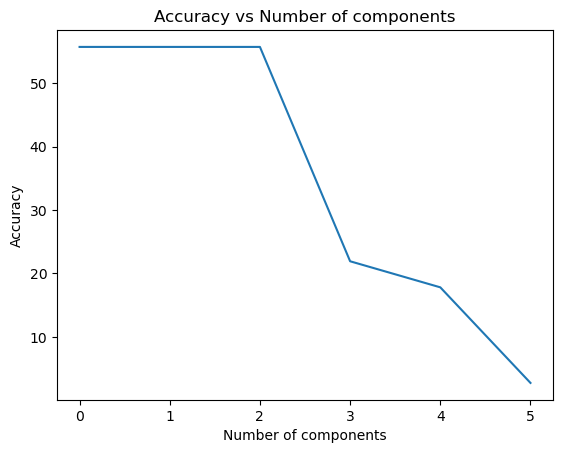

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [106]:
# I will use rbf kpca + kda linear
acc = []
precision = []
recall = []
for i in range(6):
  kpca = KernelPCA(n_components= i + 1, kernel='rbf')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the kda
  cls = Kfda(n_components=i+1, kernel='linear')
  warnings.filterwarnings('ignore')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


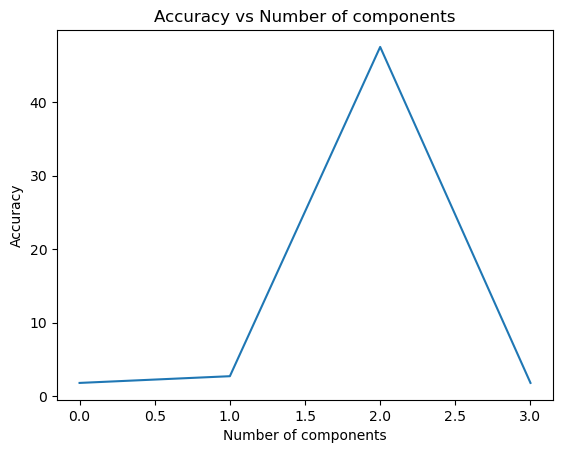

Best number of components: 3
Best accuracy: 47.48858447488584
Best precision: 17.2927847346452
Best recall: 19.046343001261036


In [107]:
# I will use polynimial kpca + kda linear
acc = []
precision = []
recall = []
for i in range(4):
  kpca = KernelPCA(n_components= i + 1, kernel='poly')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the kda
  cls = Kfda(n_components=i+1, kernel='linear')
  warnings.filterwarnings('ignore')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


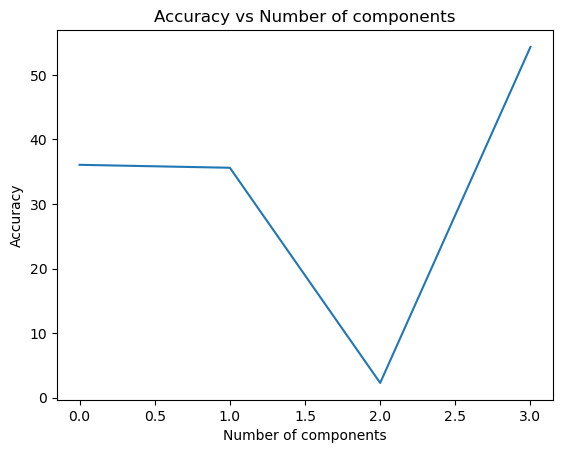

Best number of components: 4
Best accuracy: 54.337899543378995
Best precision: 11.173708920187792
Best recall: 19.508196721311474


In [108]:
# I will use linear kpca + kda linear
acc = []
precision = []
recall = []
for i in range(4):
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the kda
  cls = Kfda(n_components=i+1, kernel='linear')
  warnings.filterwarnings('ignore')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


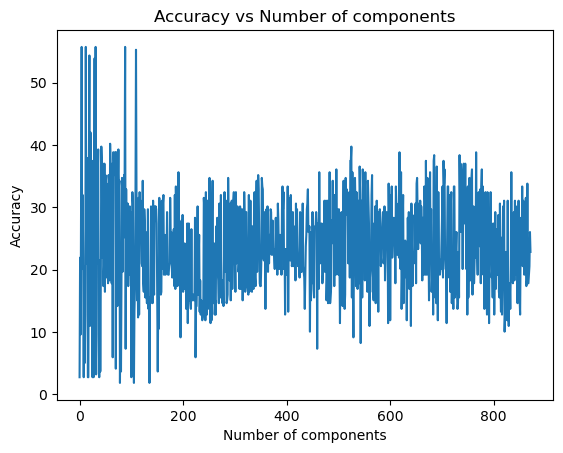

Best number of components: 5
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [112]:
#I will use combined kpca + kda linear
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  ckpca = combined_kpca(x_train, x_test, n_components=i+1, gamma=1, degree=2)
  cls = Kfda(n_components=i+1, kernel='linear')
  warnings.filterwarnings('ignore')
  cls.fit(ckpca[0], y_train)
  y_pred = cls.predict(ckpca[1])
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

# (KDA) with Polynomials classifiers on: - Whole data - Data reduced by PCA - Data reduced by KPCA with RBF, Polynomial, and Linear kernels

In [113]:
# Whole data kda poly
cls = Kfda(4, kernel='poly')
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)
print(accuracy_score(y_test,y_pred) * 100)

30.59360730593607


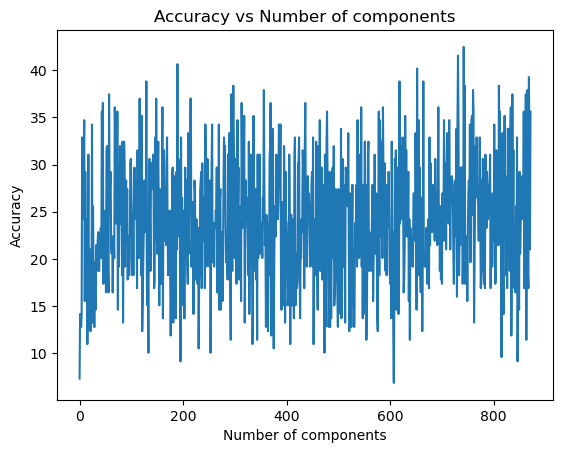

Best number of components: 743
Best accuracy: 42.465753424657535
Best precision: 28.18177163338454
Best recall: 25.856452290878522


In [115]:
# I will use pca + kda poly
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  pca = PCA(n_components= i + 1)
  pca.fit(x_train)
  x_train_pca = pca.transform(x_train)
  x_test_pca = pca.transform(x_test)
  #train the kda classifier on pc components
  cls = Kfda(n_components=i+1, kernel='poly')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


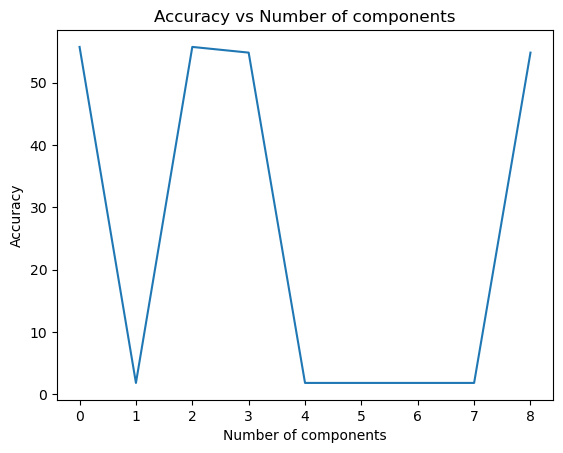

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [116]:
# I will use rbf kpca + kda poly
acc = []
precision = []
recall = []
for i in range(9):
  kpca = KernelPCA(n_components= i + 1, kernel='rbf')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the kda
  cls = Kfda(n_components=i+1, kernel='poly')
  warnings.filterwarnings('ignore')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


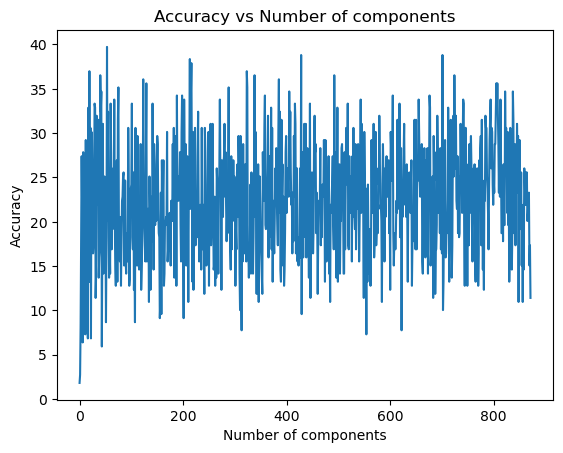

Best number of components: 54
Best accuracy: 39.726027397260275
Best precision: 23.610993869962822
Best recall: 21.76387137452711


In [117]:
# I will use polynimial kpca + kda poly
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='poly')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the kda
  cls = Kfda(n_components=i+1, kernel='poly')
  warnings.filterwarnings('ignore')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


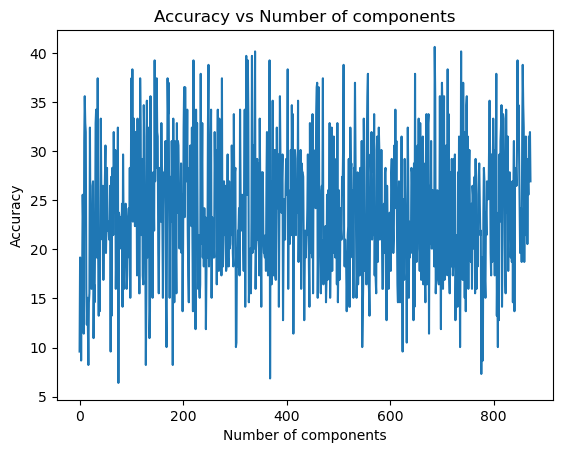

Best number of components: 687
Best accuracy: 40.63926940639269
Best precision: 22.063455303381193
Best recall: 20.38934426229508


In [118]:
# I will use linear kpca + kda poly
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  #train the kda
  kpca = KernelPCA(n_components= i + 1, kernel='linear')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the kda
  cls = Kfda(n_components=i+1, kernel='poly')
  warnings.filterwarnings('ignore')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


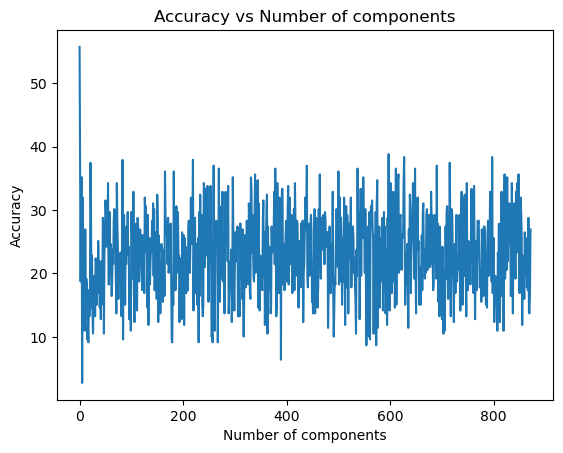

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [119]:
#I will use combined kpca + kda poly
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  ckpca = combined_kpca(x_train, x_test, n_components=i+1, gamma=1, degree=2)
  cls = Kfda(n_components=i+1, kernel='poly')
  warnings.filterwarnings('ignore')
  cls.fit(ckpca[0], y_train)
  y_pred = cls.predict(ckpca[1])
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")

# KDA with RBF classifiers on: - Whole data - Data reduced by PCA - Data reduced by KPCA with RBF, Polynomial, and Linear kernels

In [120]:
# Whole data kda RBF
cls = Kfda(4, kernel='rbf')
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)
print(accuracy_score(y_test,y_pred) * 100)

55.70776255707762


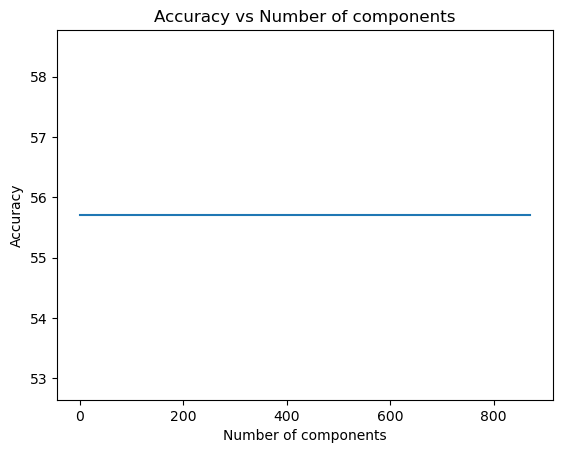

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [121]:
# I will use pca + kda RBF
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  pca = PCA(n_components= i + 1)
  pca.fit(x_train)
  x_train_pca = pca.transform(x_train)
  x_test_pca = pca.transform(x_test)
  #train the kda classifier on pc components
  cls = Kfda(n_components=i+1, kernel='rbf')
  warnings.filterwarnings('ignore')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


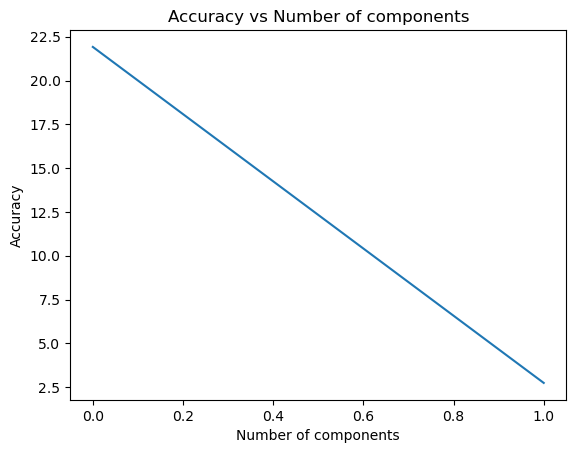

Best number of components: 1
Best accuracy: 21.91780821917808
Best precision: 4.383561643835616
Best recall: 20.0


In [122]:
# I will use rbf kpca + kda rbf
acc = []
precision = []
recall = []
for i in range(2):
  kpca = KernelPCA(n_components= i + 1, kernel='rbf')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the kda
  cls = Kfda(n_components=1 , kernel='rbf')
  warnings.filterwarnings('ignore')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


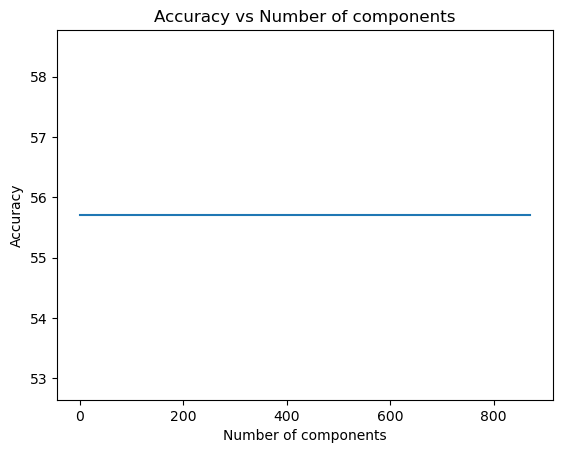

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [123]:
# I will use polynimial kpca + kda rbf
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='poly')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the kda
  cls = Kfda(n_components=i+1, kernel='rbf')
  warnings.filterwarnings('ignore')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


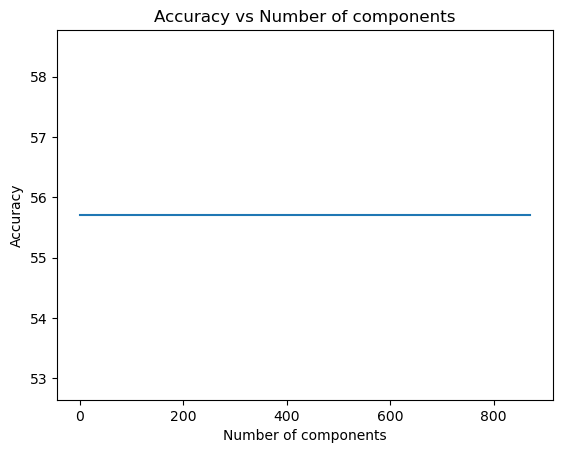

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [124]:
# I will use linear kpca + kda rbf
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  kpca = KernelPCA(n_components= i + 1, kernel='linear')
  kpca.fit(x_train)
  x_train_pca = kpca.transform(x_train)
  x_test_pca = kpca.transform(x_test)
  #train the kda
  cls = Kfda(n_components=i+1, kernel='rbf')
  warnings.filterwarnings('ignore')
  cls.fit(x_train_pca, y_train)
  y_pred = cls.predict(x_test_pca)
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")


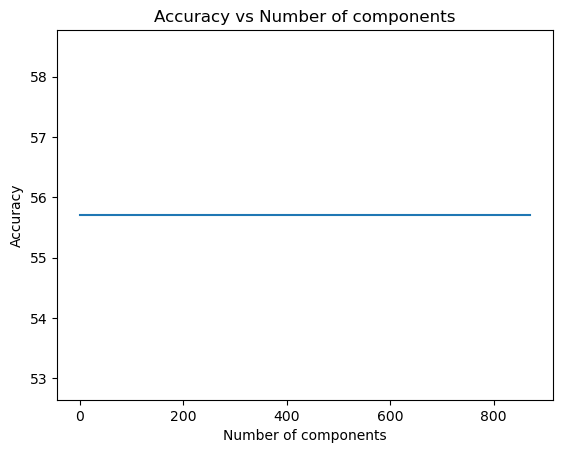

Best number of components: 1
Best accuracy: 55.70776255707762
Best precision: 11.141552511415524
Best recall: 20.0


In [125]:
#I will use combined kpca + kda rbf
acc = []
precision = []
recall = []
for i in range(0 , min(x_train.shape[0], x_train.shape[1])):
  ckpca = combined_kpca(x_train, x_test, n_components=i+1, gamma=1, degree=2)
  cls = Kfda(n_components=i+1, kernel='rbf')
  warnings.filterwarnings('ignore')
  cls.fit(ckpca[0], y_train)
  y_pred = cls.predict(ckpca[1])
  acc.append(accuracy_score(y_test,y_pred) * 100)
  precision.append(precision_score(y_test,y_pred, average='macro' , zero_division = 0) * 100)
  recall.append(recall_score(y_test,y_pred, average='macro' ,zero_division = 0) * 100)
#Plot accuracy versus the number of components for each classifier and dimensionality reduction technique.
plt.plot(acc)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of components')
plt.show()
print(f"Best number of components: {acc.index(max(acc))+ 1}")
print(f"Best accuracy: {max(acc)}")
print(f"Best precision: {precision[acc.index(max(acc))]}")
print(f"Best recall: {recall[acc.index(max(acc))]}")